In [ ]:

!pip install tensorflow==2.13.1

!pip install 'h5py<3.0.0'
import h5py
import keras
import tensorflow as tf
import numpy as np
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, Reshape, LSTM
from keras.models import load_model
from keras import Input
from keras.models import Model

from keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt

import imageio

from PIL import Image, ImageDraw, ImageFilter

from numpy.random import default_rng
rng = default_rng()

from tensorflow.python.keras import utils

from sklearn.svm import LinearSVC

from sklearn.svm import SVC

from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/

from pathlib import Path
DATA_PATH = Path("6th_publishing_paper_small_number_of_classes")
if not DATA_PATH.exists():
    DATA_PATH.mkdir(parents=True)


# Data Size

In [ ]:

data_size = 6000

number_of_classes_identity = 3
number_of_classes_illuminance = 2
number_of_classes_orientation = 2
number_of_classes_location = 9




In [ ]:

(data_train, labels_train), (data_test, labels_test) = fashion_mnist.load_data()

data_train = data_train.reshape(60000, 28, 28)
data_test = data_test.reshape(10000, 28, 28)

data_train_0 = []
data_train_1 = []
data_train_2 = []
data_train_3 = []
data_train_4 = []
data_train_5 = []
data_train_6 = []
data_train_7 = []
data_train_8 = []




for i in range(60000):
  if labels_train[i] == 0:
    data_train_0.append(data_train[i,:,:])
  if labels_train[i] == 1:
    data_train_1.append(data_train[i,:,:])
  if labels_train[i] == 2:
    data_train_2.append(data_train[i,:,:])
  if labels_train[i] == 3:
    data_train_3.append(data_train[i,:,:])
  if labels_train[i] == 4:
    data_train_4.append(data_train[i,:,:])
  if labels_train[i] == 5:
    data_train_5.append(data_train[i,:,:])
  if labels_train[i] == 6:
    data_train_6.append(data_train[i,:,:])
  if labels_train[i] == 7:
    data_train_7.append(data_train[i,:,:])
  if labels_train[i] == 8:
    data_train_8.append(data_train[i,:,:])



data_train_0 = np.asarray(data_train_0)
data_train_1 = np.asarray(data_train_1)
data_train_2 = np.asarray(data_train_2)
data_train_3 = np.asarray(data_train_3)
data_train_4 = np.asarray(data_train_4)
data_train_5 = np.asarray(data_train_5)
data_train_6 = np.asarray(data_train_6)
data_train_7 = np.asarray(data_train_7)
data_train_8 = np.asarray(data_train_8)





# 3 Objects

In [ ]:

img = np.zeros([140,140],dtype=np.uint8)
img.fill(0)

imageio.imwrite(DATA_PATH / "img.jpg", img)
img = Image.open(DATA_PATH / "img.jpg")

data_images = np.zeros((data_size,140,140))

data_images_identities_without_order = np.zeros(data_size)
data_images_identities_order_by_location = np.zeros(data_size)
data_images_identities_order_by_illuminance = np.zeros(data_size)
data_images_identities_order_by_orientation = np.zeros(data_size)

data_images_illuminance_without_order = np.zeros(data_size)
data_images_illuminance_order_by_location = np.zeros(data_size)
data_images_illuminance_order_by_identity = np.zeros(data_size)
data_images_illuminance_order_by_orientation = np.zeros(data_size)

data_images_locations_without_order = np.zeros(data_size)
data_images_locations_order_by_identity = np.zeros(data_size)
data_images_locations_order_by_orientation = np.zeros(data_size)
data_images_locations_order_by_illuminance = np.zeros(data_size)

data_images_orientations_without_order = np.zeros(data_size)
data_images_orientations_order_by_identity = np.zeros(data_size)
data_images_orientations_order_by_location = np.zeros(data_size)
data_images_orientations_order_by_illuminance = np.zeros(data_size)

for i in range(data_size):

  identity0 = rng.choice(number_of_classes_identity, size=1, replace=False)

  k = rng.choice(200, size=1, replace=False)

  if identity0 == 0:
    data_0 = data_train_0[k,:,:].reshape(28,28)
    data_0 = data_0.astype(np.uint8)
  elif identity0 == 1:
    data_0 = data_train_1[k,:,:].reshape(28,28)
    data_0 = data_0.astype(np.uint8)
  elif identity0 == 2:
    data_0 = data_train_5[k,:,:].reshape(28,28)
    data_0 = data_0.astype(np.uint8)
  elif identity0 == 3:
    data_0 = data_train_8[k,:,:].reshape(28,28)
    data_0 = data_0.astype(np.uint8)



  identity1 = rng.choice(number_of_classes_identity, size=1, replace=False)

  k = rng.choice(200, size=1, replace=False)

  if identity1 == 0:
    data_1 = data_train_0[k,:,:].reshape(28,28)
    data_1 = data_1.astype(np.uint8)
  elif identity1 == 1:
    data_1 = data_train_1[k,:,:].reshape(28,28)
    data_1 = data_1.astype(np.uint8)
  elif identity1 == 2:
    data_1 = data_train_5[k,:,:].reshape(28,28)
    data_1 = data_1.astype(np.uint8)
  elif identity1 == 3:
    data_1 = data_train_8[k,:,:].reshape(28,28)
    data_1 = data_1.astype(np.uint8)




  identity2 = rng.choice(number_of_classes_identity, size=1, replace=False)

  k = rng.choice(200, size=1, replace=False)

  if identity2 == 0:
    data_2 = data_train_0[k,:,:].reshape(28,28)
    data_2 = data_2.astype(np.uint8)
  elif identity2 == 1:
    data_2 = data_train_1[k,:,:].reshape(28,28)
    data_2 = data_2.astype(np.uint8)
  elif identity2 == 2:
    data_2 = data_train_5[k,:,:].reshape(28,28)
    data_2 = data_2.astype(np.uint8)
  elif identity2 == 3:
    data_2 = data_train_8[k,:,:].reshape(28,28)
    data_2 = data_2.astype(np.uint8)




  imageio.imwrite(DATA_PATH / 'data_0.jpg', data_0)
  data_0 = Image.open(DATA_PATH / 'data_0.jpg')
  imageio.imwrite(DATA_PATH / 'data_1.jpg', data_1)
  data_1 = Image.open(DATA_PATH / 'data_1.jpg')
  imageio.imwrite(DATA_PATH / 'data_2.jpg', data_2)
  data_2 = Image.open(DATA_PATH / 'data_2.jpg')




  illuminance_values = [np.mean(data_0), np.mean(data_1), np.mean(data_2)]
  illuminance = []
  for iii in range(3):
    if illuminance_values[iii] < (255/2)/number_of_classes_illuminance:

      illuminance.append(0)

    else:
      illuminance.append(1)



  params_illuminance = illuminance[:]
  params_illuminance.sort()

  data_images_illuminance_without_order[i] = params_illuminance[0]*(number_of_classes_illuminance**2) + params_illuminance[1]*number_of_classes_illuminance + params_illuminance[2]

  identities = np.asarray([identity0,identity1,identity2])

  identities = identities.flatten()

  sorted_index = np.argsort(identities)

  illuminance_order_by_identity = []

  for iii in range(3):
    illuminance_order_by_identity.append(illuminance[sorted_index[iii]])

  sorted_identities = np.sort(identities)

  if (sorted_identities[0] == sorted_identities[1] and sorted_identities[1] == sorted_identities[2]):
    illuminance_order_by_identity = np.sort(illuminance_order_by_identity)
  elif (sorted_identities[0] == sorted_identities[1]):
    illuminance_order_by_identity[0:2] = np.sort(illuminance_order_by_identity[0:2])
  elif (sorted_identities[1] == sorted_identities[2]):
    illuminance_order_by_identity[1:3] = np.sort(illuminance_order_by_identity[1:3])


  data_images_illuminance_order_by_identity[i] = illuminance_order_by_identity[0]*(number_of_classes_illuminance**2) + illuminance_order_by_identity[1]*number_of_classes_illuminance + illuminance_order_by_identity[2]

  identities = np.asarray([identity0,identity1,identity2])

  identities = identities.flatten()

  sorted_index = np.argsort(illuminance)

  identity_order_by_illuminance = []
  for iii in range(3):
    identity_order_by_illuminance.append(identities[sorted_index[iii]])

  sorted_illuminance = np.sort(illuminance)

  if (sorted_illuminance[0] == sorted_illuminance[1] and sorted_illuminance[1] == sorted_illuminance[2]):
    identity_order_by_illuminance = np.sort(identity_order_by_illuminance)
  elif (sorted_illuminance[0] == sorted_illuminance[1]):
    identity_order_by_illuminance[0:2] = np.sort(identity_order_by_illuminance[0:2])
  elif (sorted_illuminance[1] == sorted_illuminance[2]):
    identity_order_by_illuminance[1:3] = np.sort(identity_order_by_illuminance[1:3])

  data_images_identities_order_by_illuminance[i] = identity_order_by_illuminance[0]*(number_of_classes_identity**2) + identity_order_by_illuminance[1]*number_of_classes_identity + identity_order_by_illuminance[2]









  ii_orientations = rng.choice(number_of_classes_orientation ** 3, size = 1, replace = False)
  A_orientation = int(ii_orientations/(number_of_classes_orientation**2))
  B_orientation = int((ii_orientations%(number_of_classes_orientation**2))/number_of_classes_orientation)
  C_orientation = int(ii_orientations%number_of_classes_orientation)



  params_orientation = [A_orientation,B_orientation,C_orientation]
  params_orientation.sort()
  data_images_orientations_without_order[i] = params_orientation[0]* (number_of_classes_orientation**2) + params_orientation[1]*number_of_classes_orientation + params_orientation[2]


  identities = np.asarray([identity0,identity1,identity2])

  identities = identities.flatten()

  sorted_index = np.argsort(identities)

  orientations = []
  params_orientation = [A_orientation,B_orientation,C_orientation]
  for iii in range(3):
    orientations.append(params_orientation[sorted_index[iii]])

  sorted_identities = np.sort(identities)

  if (sorted_identities[0] == sorted_identities[1] and sorted_identities[1] == sorted_identities[2]):
    orientations = np.sort(orientations)
  elif (sorted_identities[0] == sorted_identities[1]):
    orientations[0:2] = np.sort(orientations[0:2])
  elif (sorted_identities[1] == sorted_identities[2]):
    orientations[1:3] = np.sort(orientations[1:3])

  data_images_orientations_order_by_identity[i] = orientations[0] * (number_of_classes_orientation**2) + orientations[1] * number_of_classes_orientation + orientations[2]










  illumiance_copy = illuminance[:]

  sorted_index = np.argsort(illumiance_copy)

  orientations = []
  params_orientation = [A_orientation,B_orientation,C_orientation]
  for iii in range(3):
    orientations.append(params_orientation[sorted_index[iii]])

  sorted_illuminance = np.sort(illumiance_copy)

  if (sorted_illuminance[0] == sorted_illuminance[1] and sorted_illuminance[1] == sorted_illuminance[2]):
    orientations = np.sort(orientations)
  elif (sorted_illuminance[0] == sorted_illuminance[1]):
    orientations[0:2] = np.sort(orientations[0:2])
  elif (sorted_illuminance[1] == sorted_illuminance[2]):
    orientations[1:3] = np.sort(orientations[1:3])

  data_images_orientations_order_by_illuminance[i] = orientations[0] * (number_of_classes_orientation**2) + orientations[1] * number_of_classes_orientation + orientations[2]





  identities = np.asarray([identity0,identity1,identity2])

  identities = identities.flatten()

  orientations = [A_orientation,B_orientation,C_orientation]

  sorted_index = np.argsort(orientations)

  identity_order_by_orientation = []

  for iii in range(3):
    identity_order_by_orientation.append(identities[sorted_index[iii]])

  orientations = [A_orientation,B_orientation,C_orientation]
  sorted_orientations = np.sort(orientations)

  if (sorted_orientations[0] == sorted_orientations[1] and sorted_orientations[1] == sorted_orientations[2]):
    identity_order_by_orientation = np.sort(identity_order_by_orientation)
  elif (sorted_orientations[0] == sorted_orientations[1]):
    identity_order_by_orientation[0:2] = np.sort(identity_order_by_orientation[0:2])
  elif (sorted_orientations[1] == sorted_orientations[2]):
    identity_order_by_orientation[1:3] = np.sort(identity_order_by_orientation[1:3])

  data_images_identities_order_by_orientation[i] = number_of_classes_identity**2 * identity_order_by_orientation[0] + number_of_classes_identity * identity_order_by_orientation[1] + identity_order_by_orientation[2]


  orientations = [A_orientation,B_orientation,C_orientation]

  sorted_index = np.argsort(orientations)

  illuminance_order_by_orientation = []

  for iii in range(3):
    illuminance_order_by_orientation.append(illuminance[sorted_index[iii]])

  orientations = [A_orientation,B_orientation,C_orientation]
  sorted_orientations = np.sort(orientations)

  if (sorted_orientations[0] == sorted_orientations[1] and sorted_orientations[1] == sorted_orientations[2]):
    illuminance_order_by_orientation = np.sort(illuminance_order_by_orientation)
  elif (sorted_orientations[0] == sorted_orientations[1]):
    illuminance_order_by_orientation[0:2] = np.sort(illuminance_order_by_orientation[0:2])
  elif (sorted_orientations[1] == sorted_orientations[2]):
    illuminance_order_by_orientation[1:3] = np.sort(illuminance_order_by_orientation[1:3])

  data_images_illuminance_order_by_orientation[i] = number_of_classes_illuminance**2 * illuminance_order_by_orientation[0] + number_of_classes_illuminance * illuminance_order_by_orientation[1] + illuminance_order_by_orientation[2]


  while(1):
    ii = rng.choice((number_of_classes_location**3), size=1, replace=False)
    A = int(ii/(number_of_classes_location**2))
    B = int((ii%(number_of_classes_location**2))/number_of_classes_location)
    C = int(ii%number_of_classes_location)
    if A != B and B != C and A != C:
      break

  params = [A,B,C]
  params.sort()
  data_images_locations_without_order[i] = params[0]*(number_of_classes_location**2) + params[1]*number_of_classes_location + params[2]

  identities = []
  params = [A,B,C]
  params.sort()
  for iii in range(3):
    if params[iii] == A:
      identities.append(identity0)
    elif params[iii] == B:
      identities.append(identity1)
    elif params[iii] == C:
      identities.append(identity2)

  data_images_identities_order_by_location[i] = number_of_classes_identity**2 * identities[0] + number_of_classes_identity * identities[1] + identities[2]

  identity_without_order = sorted(identities)

  data_images_identities_without_order[i] = number_of_classes_identity**2 * identity_without_order[0] + number_of_classes_identity * identity_without_order[1] + identity_without_order[2]



  illuminance_order_by_location = []
  params = [A,B,C]
  params.sort()
  for iii in range(3):
    if params[iii] == A:
      illuminance_order_by_location.append(illuminance[0])
    elif params[iii] == B:
      illuminance_order_by_location.append(illuminance[1])
    elif params[iii] == C:
      illuminance_order_by_location.append(illuminance[2])

  data_images_illuminance_order_by_location[i] = number_of_classes_illuminance**2 * illuminance_order_by_location[0] + number_of_classes_illuminance * illuminance_order_by_location[1] + illuminance_order_by_location[2]

  orientation_order_by_location = []
  params = [A,B,C]
  params.sort()
  for iii in range(3):
    if params[iii] == A:
      orientation_order_by_location.append(A_orientation)
    elif params[iii] == B:
      orientation_order_by_location.append(B_orientation)
    elif params[iii] == C:
      orientation_order_by_location.append(C_orientation)

  data_images_orientations_order_by_location[i] = (number_of_classes_orientation**2) * orientation_order_by_location[0] + number_of_classes_orientation * orientation_order_by_location[1] + orientation_order_by_location[2]




  identities = np.asarray([identity0,identity1,identity2])

  identities = identities.flatten()

  sorted_index = np.argsort(identities)

  locations = []
  params = [A,B,C]
  for iii in range(3):
    locations.append(params[sorted_index[iii]])

  sorted_identities = np.sort(identities)

  if (sorted_identities[0] == sorted_identities[1] and sorted_identities[1] == sorted_identities[2]):
    locations = np.sort(locations)
  elif (sorted_identities[0] == sorted_identities[1]):
    locations[0:2] = np.sort(locations[0:2])
  elif (sorted_identities[1] == sorted_identities[2]):
    locations[1:3] = np.sort(locations[1:3])

  data_images_locations_order_by_identity[i] = locations[0]*(number_of_classes_location**2) + locations[1]*number_of_classes_location + locations[2]







  illumiance_copy = illuminance[:]

  sorted_index = np.argsort(illumiance_copy)

  locations = []
  params_locations = [A,B,C]
  for iii in range(3):
    locations.append(params_locations[sorted_index[iii]])

  sorted_illuminance = np.sort(illumiance_copy)

  if (sorted_illuminance[0] == sorted_illuminance[1] and sorted_illuminance[1] == sorted_illuminance[2]):
    locations = np.sort(locations)
  elif (sorted_illuminance[0] == sorted_illuminance[1]):
    locations[0:2] = np.sort(locations[0:2])
  elif (sorted_illuminance[1] == sorted_illuminance[2]):
    locations[1:3] = np.sort(locations[1:3])

  data_images_locations_order_by_illuminance[i] = locations[0] * (number_of_classes_location**2) + locations[1] * number_of_classes_location + locations[2]







  locations = []
  params_locations = [A,B,C]

  orientations = [A_orientation,B_orientation,C_orientation]

  sorted_index = np.argsort(orientations)

  location_order_by_orientation = []

  for iii in range(3):
    location_order_by_orientation.append(params_locations[sorted_index[iii]])

  orientations = [A_orientation,B_orientation,C_orientation]

  sorted_orientations = np.sort(orientations)

  if (sorted_orientations[0] == sorted_orientations[1] and sorted_orientations[1] == sorted_orientations[2]):
    location_order_by_orientation = np.sort(location_order_by_orientation)
  elif (sorted_orientations[0] == sorted_orientations[1]):
    location_order_by_orientation[0:2] = np.sort(location_order_by_orientation[0:2])
  elif (sorted_orientations[1] == sorted_orientations[2]):
    location_order_by_orientation[1:3] = np.sort(location_order_by_orientation[1:3])

  data_images_locations_order_by_orientation[i] = (number_of_classes_location**2) * location_order_by_orientation[0] + number_of_classes_location * location_order_by_orientation[1] + location_order_by_orientation[2]










  back_im = img.copy()

  location_1 = A
  location_2 = B
  location_3 = C


  data_0 = data_0.rotate(A_orientation*180)
  data_1 = data_1.rotate(B_orientation*180)
  data_2 = data_2.rotate(C_orientation*180)

  x1 = 28 + (location_1%3)*28
  y1 = 28 + (int(location_1/3))*28

  back_im.paste(data_0,(x1,y1))

  x2 = 28 + (location_2%3)*28
  y2 = 28 + (int(location_2/3))*28
  back_im.paste(data_1,(x2,y2))

  x3 = 28 + (location_3%3)*28
  y3 = 28 + (int(location_3/3))*28
  back_im.paste(data_2,(x3,y3))


  data_images[i,:,:] = np.asarray(back_im)





In [ ]:

start = 50
for i in range(start + 0, start + 20):
    plt.imshow(data_images[i,:,:], cmap='gray', vmin=0, vmax=255)

    plt.show()


In [ ]:

data_images = data_images.reshape(data_size,140,140)



import h5py
def write_data_into_h5_file(dest_filepath, filepaths_list, filepaths_list2, data_images_identities_order_by_location, data_images_identities_order_by_illuminance, data_images_illuminance_without_order, data_images_illuminance_order_by_location, data_images_illuminance_order_by_identity, data_images_locations_without_order, data_images_locations_order_by_identity, data_images_locations_order_by_orientation, data_images_orientations_without_order, data_images_orientations_order_by_identity, data_images_orientations_order_by_location, n_px, n_channels = 1):



        #This function converts images to numpy arrays and writes the array data into a h5 file.

        #dest_filepath - the name of the file with full path that is being created
        #filepaths_list - source image file paths which is being converted to numpy arrays
        #n_px - number of pixels - will be used as image's height and width
        #n_channels - 3 for rgb



    data_shape = (filepaths_list.shape[0], n_px,n_px)

    data_shape2 = (filepaths_list.shape[0],1)

    dataset_name1 = "data_images"

    dataset_name2 = "data_images_identities_without_order"
    dataset_name3 = "data_images_identities_order_by_location"
    dataset_name4 = "data_images_identities_order_by_illuminance"

    dataset_name5 = "data_images_illuminance_without_order"
    dataset_name6 = "data_images_illuminance_order_by_location"
    dataset_name7 = "data_images_illuminance_order_by_identity"

    dataset_name8 = "data_images_locations_without_order"
    dataset_name9 = "data_images_locations_order_by_identity"
    dataset_name10 = "data_images_locations_order_by_orientation"

    dataset_name11 = "data_images_orientations_without_order"
    dataset_name12 = "data_images_orientations_order_by_identity"
    dataset_name13 = "data_images_orientations_order_by_location"

    with h5py.File(dest_filepath, 'a') as f:

        f.create_dataset(dataset_name1, data_shape, np.float32)

        f.create_dataset(dataset_name2, data_shape2, np.float32)
        f.create_dataset(dataset_name3, data_shape2, np.float32)
        f.create_dataset(dataset_name4, data_shape2, np.float32)

        f.create_dataset(dataset_name5, data_shape2, np.float32)
        f.create_dataset(dataset_name6, data_shape2, np.float32)
        f.create_dataset(dataset_name7, data_shape2, np.float32)

        f.create_dataset(dataset_name8, data_shape2, np.float32)
        f.create_dataset(dataset_name9, data_shape2, np.float32)
        f.create_dataset(dataset_name10, data_shape2, np.float32)

        f.create_dataset(dataset_name11, data_shape2, np.float32)
        f.create_dataset(dataset_name12, data_shape2, np.float32)
        f.create_dataset(dataset_name13, data_shape2, np.float32)

        for i in range(filepaths_list.shape[0]):

            data_images = filepaths_list[i,:,:]

            data_images_identities_without_order0 = filepaths_list2[i]
            data_images_identities_order_by_location0 = data_images_identities_order_by_location[i]
            data_images_identities_order_by_illuminance0 = data_images_identities_order_by_illuminance[i]

            data_images_illuminance_without_order0 = data_images_illuminance_without_order[i]
            data_images_illuminance_order_by_location0 = data_images_illuminance_order_by_location[i]
            data_images_illuminance_order_by_identity0 = data_images_illuminance_order_by_identity[i]

            data_images_locations_without_order0 = data_images_locations_without_order[i]
            data_images_locations_order_by_identity0 = data_images_locations_order_by_identity[i]
            data_images_locations_order_by_orientation0 = data_images_locations_order_by_orientation[i]

            data_images_orientations_without_order0 = data_images_orientations_without_order[i]
            data_images_orientations_order_by_identity0 = data_images_orientations_order_by_identity[i]
            data_images_orientations_order_by_location0 = data_images_orientations_order_by_location[i]

            f[dataset_name1][i, ...] = data_images[None]

            f[dataset_name2][i, ...] = data_images_identities_without_order0
            f[dataset_name3][i, ...] = data_images_identities_order_by_location0
            f[dataset_name4][i, ...] = data_images_identities_order_by_illuminance0

            f[dataset_name5][i, ...] = data_images_illuminance_without_order0
            f[dataset_name6][i, ...] = data_images_illuminance_order_by_location0
            f[dataset_name7][i, ...] = data_images_illuminance_order_by_identity0

            f[dataset_name8][i, ...] = data_images_locations_without_order0
            f[dataset_name9][i, ...] = data_images_locations_order_by_identity0
            f[dataset_name10][i, ...] = data_images_locations_order_by_orientation0

            f[dataset_name11][i, ...] = data_images_orientations_without_order0
            f[dataset_name12][i, ...] = data_images_orientations_order_by_identity0
            f[dataset_name13][i, ...] = data_images_orientations_order_by_location0



write_data_into_h5_file(DATA_PATH / 'Data_Images_3_Objects', data_images,data_images_identities_without_order, data_images_identities_order_by_location, data_images_identities_order_by_illuminance, data_images_illuminance_without_order, data_images_illuminance_order_by_location, data_images_illuminance_order_by_identity, data_images_locations_without_order, data_images_locations_order_by_identity, data_images_locations_order_by_orientation, data_images_orientations_without_order, data_images_orientations_order_by_identity, data_images_orientations_order_by_location, 140, n_channels = 1)





# After Data Preparation

In [ ]:

data_size = 6000

number_of_repetitions = 3

number_of_classes_identity = 3
number_of_classes_illuminance = 2
number_of_classes_orientation = 2
number_of_classes_location = 9


In [ ]:

!pip install 'h5py<3.0.0'
import h5py
import keras
import tensorflow as tf
import numpy as np
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, Reshape, LSTM
from keras.models import load_model
from keras import Input
from keras.models import Model

from keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt

import imageio

from PIL import Image, ImageDraw, ImageFilter

from numpy.random import default_rng
rng = default_rng()

from tensorflow.python.keras import utils

from sklearn.svm import LinearSVC

from sklearn.svm import SVC

from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/

from pathlib import Path
DATA_PATH = Path("6th_publishing_paper_small_number_of_classes")
if not DATA_PATH.exists():
    DATA_PATH.mkdir(parents=True)



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.1/301.1 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for h5py
  Running setup.py clean for h5py
Failed to build h5py
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (h5py)
Mounted at /content/gdrive
/content/gdrive/My Drive


# Load Data

In [ ]:

def load_and_split_data(cross_validation_round = 0):

  def keys(f):
    return [key for key in f.keys()]

  f = h5py.File(DATA_PATH / 'Data_Images_3_Objects', 'r')

  data_images = np.asarray(f['data_images'])

  data_images_identities_order_by_location = np.asarray(f['data_images_identities_order_by_location'])

  data_images_illuminance_order_by_location = np.asarray(f['data_images_illuminance_order_by_location'])

  data_images_locations_without_order = np.asarray(f['data_images_locations_without_order'])

  data_images_orientations_order_by_location = np.asarray(f['data_images_orientations_order_by_location'])


  data_images = np.reshape(data_images,[data_size,140,140,1])

  # np.random.shuffle(data_images) # shuffle the images

  # divide the dataset into 6 parts

  data_images_part_01 = data_images[0:int((1/6)*data_size),:,:,:]/255

  data_images_part_02 = data_images[int((1/6)*data_size):int((2/6)*data_size),:,:,:]/255

  data_images_part_03 = data_images[int((2/6)*data_size):int((3/6)*data_size),:,:,:]/255

  data_images_part_04 = data_images[int((3/6)*data_size):int((4/6)*data_size),:,:,:]/255

  data_images_part_05 = data_images[int((4/6)*data_size):int((5/6)*data_size),:,:,:]/255

  data_images_part_06 = data_images[int((5/6)*data_size):int((1)*data_size),:,:,:]/255



  if (cross_validation_round == 0):

    train_data_images = np.concatenate((data_images_part_01, data_images_part_02, data_images_part_03, data_images_part_04), axis=0)

    validation_data_images = data_images_part_05

    test_data_images = data_images_part_06

    # training

    train_data_images_identities_order_by_location = data_images_identities_order_by_location[0:int((2/3)*data_size)]

    train_data_images_illuminance_order_by_location = data_images_illuminance_order_by_location[0:int((2/3)*data_size)]

    train_data_images_locations_without_order = data_images_locations_without_order[0:int((2/3)*data_size)]

    train_data_images_orientations_order_by_location = data_images_orientations_order_by_location[0:int((2/3)*data_size)]

    # validation

    validation_data_images_identities_order_by_location = data_images_identities_order_by_location[int((2/3)*data_size):int((5/6)*data_size)]

    validation_data_images_illuminance_order_by_location = data_images_illuminance_order_by_location[int((2/3)*data_size):int((5/6)*data_size)]

    validation_data_images_locations_without_order = data_images_locations_without_order[int((2/3)*data_size):int((5/6)*data_size)]

    validation_data_images_orientations_order_by_location = data_images_orientations_order_by_location[int((2/3)*data_size):int((5/6)*data_size)]


    # testing

    test_data_images_identities_order_by_location = data_images_identities_order_by_location[int((5/6)*data_size):int((1)*data_size)]

    test_data_images_illuminance_order_by_location = data_images_illuminance_order_by_location[int((5/6)*data_size):int((1)*data_size)]

    test_data_images_locations_without_order = data_images_locations_without_order[int((5/6)*data_size):int((1)*data_size)]

    test_data_images_orientations_order_by_location = data_images_orientations_order_by_location[int((5/6)*data_size):int((1)*data_size)]


  elif (cross_validation_round == 1):

    train_data_images = np.concatenate((data_images_part_03, data_images_part_04, data_images_part_05, data_images_part_06), axis=0)

    validation_data_images = data_images_part_01

    test_data_images = data_images_part_02

    # training

    train_data_images_identities_order_by_location = data_images_identities_order_by_location[int((1/3)*data_size):int((1)*data_size)]

    train_data_images_illuminance_order_by_location = data_images_illuminance_order_by_location[int((1/3)*data_size):int((1)*data_size)]

    train_data_images_locations_without_order = data_images_locations_without_order[int((1/3)*data_size):int((1)*data_size)]

    train_data_images_orientations_order_by_location = data_images_orientations_order_by_location[int((1/3)*data_size):int((1)*data_size)]

    # validation

    validation_data_images_identities_order_by_location = data_images_identities_order_by_location[0:int((1/6)*data_size)]

    validation_data_images_illuminance_order_by_location = data_images_illuminance_order_by_location[0:int((1/6)*data_size)]

    validation_data_images_locations_without_order = data_images_locations_without_order[0:int((1/6)*data_size)]

    validation_data_images_orientations_order_by_location = data_images_orientations_order_by_location[0:int((1/6)*data_size)]


    # testing

    test_data_images_identities_order_by_location = data_images_identities_order_by_location[int((1/6)*data_size):int((2/6)*data_size)]

    test_data_images_illuminance_order_by_location = data_images_illuminance_order_by_location[int((1/6)*data_size):int((2/6)*data_size)]

    test_data_images_locations_without_order = data_images_locations_without_order[int((1/6)*data_size):int((2/6)*data_size)]

    test_data_images_orientations_order_by_location = data_images_orientations_order_by_location[int((1/6)*data_size):int((2/6)*data_size)]

  else:

    train_data_images = np.concatenate((data_images_part_01, data_images_part_02, data_images_part_05, data_images_part_06), axis=0)

    validation_data_images = data_images_part_03

    test_data_images = data_images_part_04

    # training

    train_data_images_identities_order_by_location = np.concatenate((data_images_identities_order_by_location[0:int((1/3)*data_size)], data_images_identities_order_by_location[int((2/3)*data_size):int((1)*data_size)]), axis=0)

    train_data_images_illuminance_order_by_location = np.concatenate((data_images_illuminance_order_by_location[0:int((1/3)*data_size)], data_images_illuminance_order_by_location[int((2/3)*data_size):int((1)*data_size)]), axis=0)

    train_data_images_locations_without_order = np.concatenate((data_images_locations_without_order[0:int((1/3)*data_size)], data_images_locations_without_order[int((2/3)*data_size):int((1)*data_size)]), axis=0)

    train_data_images_orientations_order_by_location = np.concatenate((data_images_orientations_order_by_location[0:int((1/3)*data_size)], data_images_orientations_order_by_location[int((2/3)*data_size):int((1)*data_size)]), axis=0)

    # validation

    validation_data_images_identities_order_by_location = data_images_identities_order_by_location[int((1/3)*data_size):int((3/6)*data_size)]

    validation_data_images_illuminance_order_by_location = data_images_illuminance_order_by_location[int((1/3)*data_size):int((3/6)*data_size)]

    validation_data_images_locations_without_order = data_images_locations_without_order[int((1/3)*data_size):int((3/6)*data_size)]

    validation_data_images_orientations_order_by_location = data_images_orientations_order_by_location[int((1/3)*data_size):int((3/6)*data_size)]


    # testing

    test_data_images_identities_order_by_location = data_images_identities_order_by_location[int((3/6)*data_size):int((4/6)*data_size)]

    test_data_images_illuminance_order_by_location = data_images_illuminance_order_by_location[int((3/6)*data_size):int((4/6)*data_size)]

    test_data_images_locations_without_order = data_images_locations_without_order[int((3/6)*data_size):int((4/6)*data_size)]

    test_data_images_orientations_order_by_location = data_images_orientations_order_by_location[int((3/6)*data_size):int((4/6)*data_size)]



  return train_data_images_identities_order_by_location, train_data_images_illuminance_order_by_location, \
  train_data_images_orientations_order_by_location,  train_data_images_locations_without_order, \
  validation_data_images_identities_order_by_location, validation_data_images_illuminance_order_by_location, \
  validation_data_images_orientations_order_by_location, validation_data_images_locations_without_order, \
  test_data_images_identities_order_by_location, test_data_images_illuminance_order_by_location, \
  test_data_images_orientations_order_by_location, test_data_images_locations_without_order, \
  train_data_images, validation_data_images, test_data_images





In [ ]:

'''

import h5py

def keys(f):
    return [key for key in f.keys()]

f = h5py.File(DATA_PATH / 'Data_Images_3_Objects', 'r')

# print(keys(f))

data_images = np.asarray(f['data_images'])

data_images_identities_without_order = np.asarray(f['data_images_identities_without_order'])

data_images_identities_order_by_location = np.asarray(f['data_images_identities_order_by_location'])

data_images_identities_order_by_illuminance = np.asarray(f['data_images_identities_order_by_illuminance'])


data_images_illuminance_without_order = np.asarray(f['data_images_illuminance_without_order'])

data_images_illuminance_order_by_location = np.asarray(f['data_images_illuminance_order_by_location'])

data_images_illuminance_order_by_identity = np.asarray(f['data_images_illuminance_order_by_identity'])


data_images_locations_without_order = np.asarray(f['data_images_locations_without_order'])

data_images_locations_order_by_identity = np.asarray(f['data_images_locations_order_by_identity'])

data_images_locations_order_by_orientation = np.asarray(f['data_images_locations_order_by_orientation'])


data_images_orientations_without_order = np.asarray(f['data_images_orientations_without_order'])

data_images_orientations_order_by_identity = np.asarray(f['data_images_orientations_order_by_identity'])

data_images_orientations_order_by_location = np.asarray(f['data_images_orientations_order_by_location'])



data_images = np.reshape(data_images,[data_size,140,140,1])

train_data_images = data_images[0:int((2/3)*data_size),:,:,:]/255

validation_data_images = data_images[int((2/3)*data_size):int((5/6)*data_size),:,:,:]/255

test_data_images = data_images[int((5/6)*data_size):int((1)*data_size),:,:,:]/255

# training

train_data_images_identities_without_order = data_images_identities_without_order[0:int((2/3)*data_size)]

train_data_images_identities_order_by_location = data_images_identities_order_by_location[0:int((2/3)*data_size)]

train_data_images_identities_order_by_illuminance = data_images_identities_order_by_illuminance[0:int((2/3)*data_size)]


train_data_images_illuminance_without_order = data_images_illuminance_without_order[0:int((2/3)*data_size)]

train_data_images_illuminance_order_by_location = data_images_illuminance_order_by_location[0:int((2/3)*data_size)]

train_data_images_illuminance_order_by_identity = data_images_illuminance_order_by_identity[0:int((2/3)*data_size)]


train_data_images_locations_without_order = data_images_locations_without_order[0:int((2/3)*data_size)]

train_data_images_locations_order_by_identity = data_images_locations_order_by_identity[0:int((2/3)*data_size)]

train_data_images_locations_order_by_orientation = data_images_locations_order_by_orientation[0:int((2/3)*data_size)]


train_data_images_orientations_without_order = data_images_orientations_without_order[0:int((2/3)*data_size)]

train_data_images_orientations_order_by_identity = data_images_orientations_order_by_identity[0:int((2/3)*data_size)]

train_data_images_orientations_order_by_location = data_images_orientations_order_by_location[0:int((2/3)*data_size)]


# validation



validation_data_images_identities_without_order = data_images_identities_without_order[int((2/3)*data_size):int((5/6)*data_size)]

validation_data_images_identities_order_by_location = data_images_identities_order_by_location[int((2/3)*data_size):int((5/6)*data_size)]

validation_data_images_identities_order_by_illuminance = data_images_identities_order_by_illuminance[int((2/3)*data_size):int((5/6)*data_size)]


validation_data_images_illuminance_without_order = data_images_illuminance_without_order[int((2/3)*data_size):int((5/6)*data_size)]

validation_data_images_illuminance_order_by_location = data_images_illuminance_order_by_location[int((2/3)*data_size):int((5/6)*data_size)]

validation_data_images_illuminance_order_by_identity = data_images_illuminance_order_by_identity[int((2/3)*data_size):int((5/6)*data_size)]


validation_data_images_locations_without_order = data_images_locations_without_order[int((2/3)*data_size):int((5/6)*data_size)]

validation_data_images_locations_order_by_identity = data_images_locations_order_by_identity[int((2/3)*data_size):int((5/6)*data_size)]

validation_data_images_locations_order_by_orientation = data_images_locations_order_by_orientation[int((2/3)*data_size):int((5/6)*data_size)]


validation_data_images_orientations_without_order = data_images_orientations_without_order[int((2/3)*data_size):int((5/6)*data_size)]

validation_data_images_orientations_order_by_identity = data_images_orientations_order_by_identity[int((2/3)*data_size):int((5/6)*data_size)]

validation_data_images_orientations_order_by_location = data_images_orientations_order_by_location[int((2/3)*data_size):int((5/6)*data_size)]

# testing

test_data_images_identities_without_order = data_images_identities_without_order[int((5/6)*data_size):int((1)*data_size)]

test_data_images_identities_order_by_location = data_images_identities_order_by_location[int((5/6)*data_size):int((1)*data_size)]

test_data_images_identities_order_by_illuminance = data_images_identities_order_by_illuminance[int((5/6)*data_size):int((1)*data_size)]


test_data_images_illuminance_without_order = data_images_illuminance_without_order[int((5/6)*data_size):int((1)*data_size)]

test_data_images_illuminance_order_by_location = data_images_illuminance_order_by_location[int((5/6)*data_size):int((1)*data_size)]

test_data_images_illuminance_order_by_identity = data_images_illuminance_order_by_identity[int((5/6)*data_size):int((1)*data_size)]


test_data_images_locations_without_order = data_images_locations_without_order[int((5/6)*data_size):int((1)*data_size)]

test_data_images_locations_order_by_identity = data_images_locations_order_by_identity[int((5/6)*data_size):int((1)*data_size)]

test_data_images_locations_order_by_orientation = data_images_locations_order_by_orientation[int((5/6)*data_size):int((1)*data_size)]


test_data_images_orientations_without_order = data_images_orientations_without_order[int((5/6)*data_size):int((1)*data_size)]

test_data_images_orientations_order_by_identity = data_images_orientations_order_by_identity[int((5/6)*data_size):int((1)*data_size)]

test_data_images_orientations_order_by_location = data_images_orientations_order_by_location[int((5/6)*data_size):int((1)*data_size)]

'''




"\n\nimport h5py\n\ndef keys(f):\n    return [key for key in f.keys()]\n\nf = h5py.File(DATA_PATH / 'Data_Images_3_Objects', 'r')\n\n# print(keys(f))\n\ndata_images = np.asarray(f['data_images'])\n\ndata_images_identities_without_order = np.asarray(f['data_images_identities_without_order'])\n\ndata_images_identities_order_by_location = np.asarray(f['data_images_identities_order_by_location'])\n\ndata_images_identities_order_by_illuminance = np.asarray(f['data_images_identities_order_by_illuminance'])\n\n\ndata_images_illuminance_without_order = np.asarray(f['data_images_illuminance_without_order'])\n\ndata_images_illuminance_order_by_location = np.asarray(f['data_images_illuminance_order_by_location'])\n\ndata_images_illuminance_order_by_identity = np.asarray(f['data_images_illuminance_order_by_identity'])\n\n\ndata_images_locations_without_order = np.asarray(f['data_images_locations_without_order'])\n\ndata_images_locations_order_by_identity = np.asarray(f['data_images_locations_order

# Identity Network Order by Location

In [ ]:

'''
from keras.models import Sequential
from keras.layers import Dense, Activation

accuracy = []

for i in range(number_of_repetitions):
#Create and train model architecture
  def CNN_network():
      model = Sequential()

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None,input_shape=(140,140,1)))

      model.add(Conv2D(256,(10,10),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(256,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(128,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Flatten())

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(number_of_classes_identity ** 3,activation='softmax'))

      return model


  CNN_network = CNN_network()
  CNN_network.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

  es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=20, restore_best_weights=True)

  history = CNN_network.fit(train_data_images,train_data_images_identities_order_by_location,validation_data=(validation_data_images,validation_data_images_identities_order_by_location),epochs=200,batch_size=256,shuffle=True, callbacks=[es])

  scores = CNN_network.evaluate(test_data_images,test_data_images_identities_order_by_location)
  accuracy.append(scores[1])
  print("Accuracy:%.2f%%" %(scores[1]*100))


# serialize model to JSON
CNN_network_json = CNN_network.to_json()
with open(DATA_PATH / "CNN_network_identities_order_by_location.json", "w") as json_file:
    json_file.write(CNN_network_json)
# serialize weights to HDF5
CNN_network.save_weights(DATA_PATH / "CNN_network_identities_order_by_location.h5")
CNN_network.save(DATA_PATH / "CNN_network_identities_order_by_location_model.h5")
print("Saved model to disk")



print(accuracy)

#Plot accuracy vs epoch

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1.0])
plt.xlabel('Epoch')
plt.legend(['training','validation'],loc='upper left')
plt.show()

'''


'\nfrom keras.models import Sequential\nfrom keras.layers import Dense, Activation\n\naccuracy = []\n\nfor i in range(number_of_repetitions):\n#Create and train model architecture\n  def CNN_network():\n      model = Sequential()\n\n      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding=\'valid\',data_format=None,input_shape=(140,140,1)))\n\n      model.add(Conv2D(256,(10,10),activation=\'relu\'))\n\n      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding=\'valid\',data_format=None))\n\n      model.add(Conv2D(256,(3,3),activation=\'relu\'))\n\n      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding=\'valid\',data_format=None))\n\n      model.add(Conv2D(128,(3,3),activation=\'relu\'))\n\n      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding=\'valid\',data_format=None))\n\n      model.add(Flatten())\n\n      model.add(Dense(100,activation=\'relu\',kernel_initializer=\'normal\'))\n\n      model.add(Dropout(0.30))\n\n      model.add(Dense(100,acti

# Illuminance Network Order by Location

In [ ]:

'''
from keras.models import Sequential
from keras.layers import Dense, Activation

accuracy = []

for i in range(number_of_repetitions):
#Create and train model architecture
  def CNN_network():
      model = Sequential()

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None,input_shape=(140,140,1)))

      model.add(Conv2D(256,(10,10),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(256,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(128,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Flatten())

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(number_of_classes_illuminance ** 3,activation='softmax'))

      return model


  CNN_network = CNN_network()
  CNN_network.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

  es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=20, restore_best_weights=True)

  history = CNN_network.fit(train_data_images,train_data_images_illuminance_order_by_location,validation_data=(validation_data_images,validation_data_images_illuminance_order_by_location),epochs=200,batch_size=256,shuffle=True, callbacks=[es])

  scores = CNN_network.evaluate(test_data_images,test_data_images_illuminance_order_by_location)
  accuracy.append(scores[1])
  print("Accuracy:%.2f%%" %(scores[1]*100))


# serialize model to JSON
CNN_network_json = CNN_network.to_json()
with open(DATA_PATH / "CNN_network_illuminance_order_by_location.json", "w") as json_file:
    json_file.write(CNN_network_json)
# serialize weights to HDF5
CNN_network.save_weights(DATA_PATH / "CNN_network_illuminance_order_by_location.h5")
CNN_network.save(DATA_PATH / "CNN_network_illuminance_order_by_location_model.h5")
print("Saved model to disk")



print(accuracy)

#Plot accuracy vs epoch

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
# plt.title('Training and Validation Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.xlim([0, 60])
plt.ylim([0, 1.0])
plt.xlabel('Epoch')
# plt.legend(['training','validation'],loc='upper left')
plt.show()

'''

'\nfrom keras.models import Sequential\nfrom keras.layers import Dense, Activation\n\naccuracy = []\n\nfor i in range(number_of_repetitions):\n#Create and train model architecture\n  def CNN_network():\n      model = Sequential()\n\n      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding=\'valid\',data_format=None,input_shape=(140,140,1)))\n\n      model.add(Conv2D(256,(10,10),activation=\'relu\'))\n\n      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding=\'valid\',data_format=None))\n\n      model.add(Conv2D(256,(3,3),activation=\'relu\'))\n\n      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding=\'valid\',data_format=None))\n\n      model.add(Conv2D(128,(3,3),activation=\'relu\'))\n\n      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding=\'valid\',data_format=None))\n\n      model.add(Flatten())\n\n      model.add(Dense(100,activation=\'relu\',kernel_initializer=\'normal\'))\n\n      model.add(Dropout(0.30))\n\n      model.add(Dense(100,acti

# Orientation Network Order by Location

In [ ]:

'''

from keras.models import Sequential
from keras.layers import Dense, Activation

accuracy = []

for i in range(number_of_repetitions):
#Create and train model architecture
  def CNN_network():
      model = Sequential()

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None,input_shape=(140,140,1)))

      model.add(Conv2D(256,(10,10),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(256,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(128,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Flatten())

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(number_of_classes_orientation ** 3,activation='softmax'))

      return model


  CNN_network = CNN_network()
  CNN_network.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

  es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=20, restore_best_weights=True)

  history = CNN_network.fit(train_data_images,train_data_images_orientations_order_by_location,validation_data=(validation_data_images,validation_data_images_orientations_order_by_location),epochs=200,batch_size=256,shuffle=True, callbacks=[es])

  scores = CNN_network.evaluate(test_data_images,test_data_images_orientations_order_by_location)
  accuracy.append(scores[1])
  print("Accuracy:%.2f%%" %(scores[1]*100))


# serialize model to JSON
CNN_network_json = CNN_network.to_json()
with open(DATA_PATH / "CNN_network_orientations_order_by_location.json", "w") as json_file:
    json_file.write(CNN_network_json)
# serialize weights to HDF5
CNN_network.save_weights(DATA_PATH / "CNN_network_orientations_order_by_location.h5")
CNN_network.save(DATA_PATH / "CNN_network_orientations_order_by_location_model.h5")
print("Saved model to disk")



print(accuracy)

#Plot accuracy vs epoch

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
# plt.title('Training and Validation Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.xlim([0, 40])
plt.ylim([0, 1.0])
plt.xlabel('Epoch')
# plt.legend(['training','validation'],loc='upper left')
plt.show()

'''



'\n\nfrom keras.models import Sequential\nfrom keras.layers import Dense, Activation\n\naccuracy = []\n\nfor i in range(number_of_repetitions):\n#Create and train model architecture\n  def CNN_network():\n      model = Sequential()\n\n      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding=\'valid\',data_format=None,input_shape=(140,140,1)))\n\n      model.add(Conv2D(256,(10,10),activation=\'relu\'))\n\n      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding=\'valid\',data_format=None))\n\n      model.add(Conv2D(256,(3,3),activation=\'relu\'))\n\n      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding=\'valid\',data_format=None))\n\n      model.add(Conv2D(128,(3,3),activation=\'relu\'))\n\n      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding=\'valid\',data_format=None))\n\n      model.add(Flatten())\n\n      model.add(Dense(100,activation=\'relu\',kernel_initializer=\'normal\'))\n\n      model.add(Dropout(0.30))\n\n      model.add(Dense(100,ac

# Location Network Without Order

In [ ]:

'''

from keras.models import Sequential
from keras.layers import Dense, Activation

accuracy = []

for i in range(number_of_repetitions):
#Create and train model architecture
  def CNN_network():
      model = Sequential()

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None,input_shape=(140,140,1)))

      model.add(Conv2D(256,(10,10),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(256,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(128,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Flatten())

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(number_of_classes_location ** 3,activation='softmax'))

      return model


  CNN_network = CNN_network()
  CNN_network.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

  es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=20, restore_best_weights=True)

  history = CNN_network.fit(train_data_images,train_data_images_locations_without_order,validation_data=(validation_data_images,validation_data_images_locations_without_order),epochs=10,batch_size=256,shuffle=True, callbacks=[es])

  scores = CNN_network.evaluate(test_data_images,test_data_images_locations_without_order)
  accuracy.append(scores[1])
  print("Accuracy:%.2f%%" %(scores[1]*100))


# serialize model to JSON
CNN_network_json = CNN_network.to_json()
with open(DATA_PATH / "CNN_network_locations_without_order.json", "w") as json_file:
    json_file.write(CNN_network_json)
# serialize weights to HDF5
CNN_network.save_weights(DATA_PATH / "CNN_network_locations_without_order.h5")
CNN_network.save(DATA_PATH / "CNN_network_locations_without_order_model.h5")
print("Saved model to disk")



print(accuracy)

#Plot accuracy vs epoch

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
# plt.title('Training and Validation Accuracy vs Epoch')
plt.xlim([0, 10])
plt.ylabel('Accuracy')
plt.ylim([0, 1.0])
plt.xlabel('Epoch')
# plt.legend(['training','validation'],loc='upper left')
plt.show()

'''



'\n\nfrom keras.models import Sequential\nfrom keras.layers import Dense, Activation\n\naccuracy = []\n\nfor i in range(number_of_repetitions):\n#Create and train model architecture\n  def CNN_network():\n      model = Sequential()\n\n      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding=\'valid\',data_format=None,input_shape=(140,140,1)))\n\n      model.add(Conv2D(256,(10,10),activation=\'relu\'))\n\n      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding=\'valid\',data_format=None))\n\n      model.add(Conv2D(256,(3,3),activation=\'relu\'))\n\n      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding=\'valid\',data_format=None))\n\n      model.add(Conv2D(128,(3,3),activation=\'relu\'))\n\n      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding=\'valid\',data_format=None))\n\n      model.add(Flatten())\n\n      model.add(Dense(100,activation=\'relu\',kernel_initializer=\'normal\'))\n\n      model.add(Dropout(0.30))\n\n      model.add(Dense(100,ac

# Network Two Pathways

## Network two pathways Identity and Illuminance (Order by Location)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/pooling/base_pooling.py:23: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(name=name, **kwargs)


Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.0381 - loss: 3.2982 - val_accuracy: 0.0400 - val_loss: 3.2894
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.0466 - loss: 3.2720 - val_accuracy: 0.0540 - val_loss: 3.1916
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.0783 - loss: 3.1328 - val_accuracy: 0.1540 - val_loss: 2.8671
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.1349 - loss: 2.8567 - val_accuracy: 0.2170 - val_loss: 2.3998
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.1984 - loss: 2.4998 - val_accuracy: 0.3460 - val_loss: 2.0817
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.2941 - loss: 2.1825 - val_accuracy: 0.4640 - val_loss: 1.7323
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.3793 - loss: 1.8615 - val_accuracy: 0.5490 - val_loss: 1.4804
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.4495 - loss: 1.6404 - val_accuracy: 0.6

Saved model to disk
Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 509ms/step - accuracy: 0.1982 - loss: 2.0301 - val_accuracy: 0.2730 - val_loss: 1.9429
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.2649 - loss: 1.9220 - val_accuracy: 0.2730 - val_loss: 1.8269
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.2985 - loss: 1.7622 - val_accuracy: 0.4080 - val_loss: 1.6828
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.3788 - loss: 1.5943 - val_accuracy: 0.5040 - val_loss: 1.4093
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.4999 - loss: 1.3412 - val_accuracy: 0.6150 - val_loss: 1.1290
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.5656 - loss: 1.1501 - val_accuracy: 0.6610 - val_loss: 0.9567
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6218 - loss: 1.0435 - val_accuracy: 0.6150 - val_loss: 1.0860
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.6220 - loss: 1.0

Saved model to disk


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 22s 874ms/step - accuracy: 0.0155 - loss: 5.3073 - val_accuracy: 0.0530 - val_loss: 4.7499
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0653 - loss: 4.6777 - val_accuracy: 0.3040 - val_loss: 3.9877
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.1520 - loss: 4.0445 - val_accuracy: 0.4110 - val_loss: 3.2480
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.2398 - loss: 3.4745 - val_accuracy: 0.4890 - val_loss: 2.6628
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3108 - loss: 3.0683 - val_accuracy: 0.5370 - val_loss: 2.2278
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3758 - loss: 2.6478 - val_accuracy: 0.5800 - val_loss: 1.8893
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4351 - loss: 2.3506 - val_accuracy: 0.6340 - val_loss: 1.6289
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4698 - loss: 2.1542 - val_accuracy: 

Saved model to disk
Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 282ms/step - accuracy: 0.2074 - loss: 2.0454 - val_accuracy: 0.2600 - val_loss: 1.9752
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.2679 - loss: 1.9751 - val_accuracy: 0.2600 - val_loss: 1.9592
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.2747 - loss: 1.9359 - val_accuracy: 0.2600 - val_loss: 1.8726
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.2804 - loss: 1.8383 - val_accuracy: 0.3340 - val_loss: 1.6766
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.3847 - loss: 1.6149 - val_accuracy: 0.5250 - val_loss: 1.3068
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.4836 - loss: 1.3688 - val_accuracy: 0.5590 - val_loss: 1.3099
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.5232 - loss: 1.2877 - val_accuracy: 0.6080 - val_loss: 1.1001
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.5793 - loss: 1.15

Saved model to disk


Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 432ms/step - accuracy: 0.0173 - loss: 5.2796 - val_accuracy: 0.1000 - val_loss: 4.5811
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0669 - loss: 4.5433 - val_accuracy: 0.3100 - val_loss: 3.8220
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.1775 - loss: 3.9374 - val_accuracy: 0.4410 - val_loss: 3.1378
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.2457 - loss: 3.4817 - val_accuracy: 0.5020 - val_loss: 2.5711
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3488 - loss: 2.9019 - val_accuracy: 0.5270 - val_loss: 2.1382
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3938 - loss: 2.5946 - val_accuracy: 0.5710 - val_loss: 1.8654
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4441 - loss: 2.3267 - val_accuracy: 0.6250 - val_loss: 1.5811
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4770 - loss: 2.1460 - val_accuracy: 

Saved model to disk
Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 259ms/step - accuracy: 0.2131 - loss: 2.0294 - val_accuracy: 0.2940 - val_loss: 1.9129
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.2549 - loss: 1.9619 - val_accuracy: 0.2940 - val_loss: 1.8118
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.2638 - loss: 1.8284 - val_accuracy: 0.3620 - val_loss: 1.6507
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.3504 - loss: 1.6735 - val_accuracy: 0.4360 - val_loss: 1.4466
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.4074 - loss: 1.5941 - val_accuracy: 0.5470 - val_loss: 1.2311
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.5074 - loss: 1.3356 - val_accuracy: 0.5880 - val_loss: 1.0954
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.5623 - loss: 1.2004 - val_accuracy: 0.6020 - val_loss: 1.0686
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.5861 - loss: 1.13

Saved model to disk


Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 409ms/step - accuracy: 0.0148 - loss: 5.3053 - val_accuracy: 0.0530 - val_loss: 4.6730
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0529 - loss: 4.6804 - val_accuracy: 0.2660 - val_loss: 3.8879
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.1335 - loss: 4.0740 - val_accuracy: 0.4210 - val_loss: 3.2119
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2346 - loss: 3.5234 - val_accuracy: 0.4930 - val_loss: 2.6166
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2943 - loss: 3.1454 - val_accuracy: 0.5300 - val_loss: 2.1716
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3548 - loss: 2.7416 - val_accuracy: 0.5860 - val_loss: 1.8078
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4306 - loss: 2.3862 - val_accuracy: 0.6340 - val_loss: 1.5344
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4492 - loss: 2.1777 - val_accuracy: 

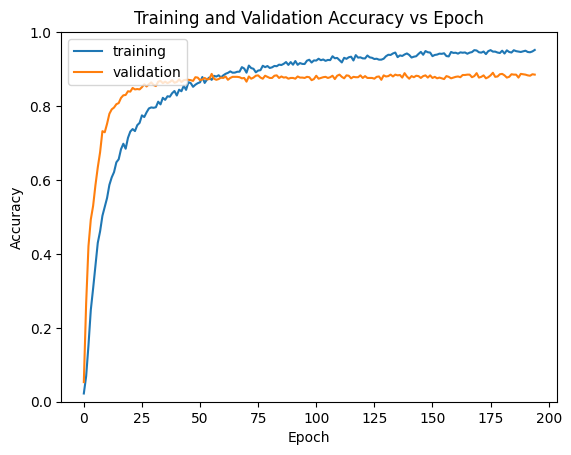

In [ ]:

accuracy = []


for i in range(number_of_repetitions):


  result = load_and_split_data(cross_validation_round = i)

  train_data_images, validation_data_images, test_data_images = result[12:15]

  labels_1 = result[0] # train_data_images_identities_order_by_location
  labels_2 = result[1] # train_data_images_illuminance_order_by_location
  train_data_images_identities_order_by_location = labels_1
  train_data_images_illuminance_order_by_location = labels_2
  combined_labels_train = labels_2 + labels_1*(number_of_classes_illuminance ** 3)

  labels_1 = result[4] # validation_data_images_identities_order_by_location
  labels_2 = result[5] # validation_data_images_illuminance_order_by_location
  validation_data_images_identities_order_by_location = labels_1
  validation_data_images_illuminance_order_by_location = labels_2
  combined_labels_validation = labels_2 + labels_1*(number_of_classes_illuminance ** 3)

  labels_1 = result[8] # test_data_images_identities_order_by_location
  labels_2 = result[9] # test_data_images_illuminance_order_by_location
  test_data_images_identities_order_by_location = labels_1
  test_data_images_illuminance_order_by_location = labels_2
  combined_labels_test = labels_2 + labels_1*(number_of_classes_illuminance ** 3)


  # train the first pathway:

  def CNN_network():
      model = Sequential()

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None,input_shape=(140,140,1)))

      model.add(Conv2D(256,(10,10),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(256,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(128,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Flatten())

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(number_of_classes_identity ** 3,activation='softmax'))

      return model


  CNN_network = CNN_network()
  CNN_network.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

  es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=20, restore_best_weights=True)

  history = CNN_network.fit(train_data_images,train_data_images_identities_order_by_location,validation_data=(validation_data_images,validation_data_images_identities_order_by_location),epochs=200,batch_size=256,shuffle=True, callbacks=[es])

  scores = CNN_network.evaluate(test_data_images,test_data_images_identities_order_by_location)



  # serialize model to JSON
  CNN_network_json = CNN_network.to_json()
  with open(DATA_PATH / "CNN_network_identities_order_by_location.json", "w") as json_file:
      json_file.write(CNN_network_json)

  CNN_network.save(DATA_PATH / "CNN_network_identities_order_by_location_model.h5")
  print("Saved model to disk")


  # train the second pathway:

  def CNN_network():
      model = Sequential()

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None,input_shape=(140,140,1)))

      model.add(Conv2D(256,(10,10),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(256,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(128,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Flatten())

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(number_of_classes_illuminance ** 3,activation='softmax'))

      return model


  CNN_network = CNN_network()
  CNN_network.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

  es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=20, restore_best_weights=True)

  history = CNN_network.fit(train_data_images,train_data_images_illuminance_order_by_location,validation_data=(validation_data_images,validation_data_images_illuminance_order_by_location),epochs=200,batch_size=256,shuffle=True, callbacks=[es])

  scores = CNN_network.evaluate(test_data_images,test_data_images_illuminance_order_by_location)



  # serialize model to JSON
  CNN_network_json = CNN_network.to_json()
  with open(DATA_PATH / "CNN_network_illuminance_order_by_location.json", "w") as json_file:
      json_file.write(CNN_network_json)

  CNN_network.save(DATA_PATH / "CNN_network_illuminance_order_by_location_model.h5")
  print("Saved model to disk")


  model_1 = load_model(DATA_PATH / 'CNN_network_identities_order_by_location_model.h5')
  model_2 = load_model(DATA_PATH / 'CNN_network_illuminance_order_by_location_model.h5')

  layers_1 = model_1.layers
  new_model_1 = tf.keras.models.Sequential(layers_1[:-1])
  layers_2 = model_2.layers
  new_model_2 = tf.keras.models.Sequential(layers_2[:-1])

  new_model_1.trainable = False
  new_model_2.trainable = False

  input = Input(shape=[140, 140, 1])
  y_1 = new_model_1(input)
  y_2 = new_model_2(input)

  common_0 = tf.keras.layers.Concatenate()([y_1,y_2])
  common_1 = tf.keras.layers.Dense(100,activation='relu',kernel_initializer='normal',input_dim=200)(common_0)
  dropout_1 = tf.keras.layers.Dropout(0.30)(common_1)
  common_2 = tf.keras.layers.Dense(100,activation='relu',kernel_initializer='normal')(dropout_1)
  dropout_2 = tf.keras.layers.Dropout(0.30)(common_2)
  common_3 = tf.keras.layers.Dense(100,activation='relu',kernel_initializer='normal')(dropout_2)
  dropout_3 = tf.keras.layers.Dropout(0.30)(common_3)

  output = tf.keras.layers.Dense((number_of_classes_identity ** 3)*(number_of_classes_illuminance ** 3),activation='softmax')(dropout_3)

  model = tf.keras.Model(inputs = input, outputs = output)

  model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

  es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=20, restore_best_weights=True)

  history = model.fit(train_data_images,combined_labels_train,validation_data=(validation_data_images,combined_labels_validation),epochs=200,batch_size=256,shuffle=True, callbacks=[es])

  scores = model.evaluate(test_data_images,combined_labels_test)
  accuracy.append(scores[1])
  print("Accuracy:%.2f%%" %(scores[1]*100))



print(accuracy)

#Plot accuracy vs epoch

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1.0])
plt.xlabel('Epoch')
plt.legend(['training','validation'],loc='upper left')
plt.show()


In [ ]:

print(accuracy)

[0.8629999756813049, 0.8899999856948853, 0.890999972820282]


## Network two pathways Identity and Location (Order by Location)

Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 275ms/step - accuracy: 0.0392 - loss: 3.2953 - val_accuracy: 0.0420 - val_loss: 3.2770
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.0538 - loss: 3.2427 - val_accuracy: 0.1370 - val_loss: 3.0483
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.1220 - loss: 2.9832 - val_accuracy: 0.2100 - val_loss: 2.5947
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.2109 - loss: 2.5730 - val_accuracy: 0.3720 - val_loss: 2.0652
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.3004 - loss: 2.1637 - val_accuracy: 0.5050 - val_loss: 1.6346
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.4130 - loss: 1.8065 - val_accuracy: 0.5740 - val_loss: 1.4075
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.5003 - loss: 1.5359 - val_accuracy: 0.6590 - val_loss: 1.1442
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.5549 - loss: 1.3743 - val_accuracy: 0

Saved model to disk
Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 25s 994ms/step - accuracy: 0.0245 - loss: 6.1137 - val_accuracy: 0.2870 - val_loss: 3.1562
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.2081 - loss: 3.3083 - val_accuracy: 0.9180 - val_loss: 0.6194
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.5398 - loss: 1.5785 - val_accuracy: 0.9940 - val_loss: 0.0849
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.7820 - loss: 0.7024 - val_accuracy: 0.9980 - val_loss: 0.0139
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8549 - loss: 0.4515 - val_accuracy: 1.0000 - val_loss: 0.0043
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9082 - loss: 0.2731 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9366 - loss: 0.1890 - val_accuracy: 1.0000 - val_loss: 4.3117e-04
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9538 - loss: 0.1519 

Saved model to disk


Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 7.8819e-05 - loss: 9.8268 - val_accuracy: 0.0010 - val_loss: 8.9220
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0016 - loss: 8.1578 - val_accuracy: 0.0020 - val_loss: 8.5000
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0032 - loss: 7.6169 - val_accuracy: 0.0080 - val_loss: 8.2807
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0092 - loss: 7.3289 - val_accuracy: 0.0130 - val_loss: 8.0999
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0136 - loss: 6.9962 - val_accuracy: 0.0250 - val_loss: 7.8309
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0223 - loss: 6.5518 - val_accuracy: 0.0560 - val_loss: 7.5457
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0374 - loss: 6.1270 - val_accuracy: 0.0900 - val_loss: 7.1123
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0394 - loss: 5.7095 - val_accuracy:

Saved model to disk
Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 326ms/step - accuracy: 0.0166 - loss: 6.1758 - val_accuracy: 0.2550 - val_loss: 3.4284
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.1916 - loss: 3.5162 - val_accuracy: 0.8690 - val_loss: 0.9696
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.4801 - loss: 1.8198 - val_accuracy: 0.9860 - val_loss: 0.1241
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7462 - loss: 0.8103 - val_accuracy: 1.0000 - val_loss: 0.0156
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8484 - loss: 0.4724 - val_accuracy: 1.0000 - val_loss: 0.0055
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9043 - loss: 0.2946 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9367 - loss: 0.1925 - val_accuracy: 1.0000 - val_loss: 7.6282e-04
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9372 - loss: 0.1914 -

Saved model to disk


Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 487ms/step - accuracy: 0.0000e+00 - loss: 9.8099 - val_accuracy: 0.0000e+00 - val_loss: 8.8791
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 7.7778e-04 - loss: 8.1062 - val_accuracy: 0.0010 - val_loss: 8.4941
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0033 - loss: 7.5877 - val_accuracy: 0.0120 - val_loss: 8.3250
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0075 - loss: 7.3765 - val_accuracy: 0.0220 - val_loss: 8.1415
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0165 - loss: 7.0509 - val_accuracy: 0.0320 - val_loss: 7.9317
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0234 - loss: 6.6464 - val_accuracy: 0.0720 - val_loss: 7.5782
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0333 - loss: 6.1475 - val_accuracy: 0.1010 - val_loss: 7.1748
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0513 - loss: 5.6644 - va

Saved model to disk
Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 327ms/step - accuracy: 0.0186 - loss: 6.1295 - val_accuracy: 0.2560 - val_loss: 3.1702
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.1783 - loss: 3.4785 - val_accuracy: 0.8800 - val_loss: 0.9267
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.4962 - loss: 1.7526 - val_accuracy: 0.9920 - val_loss: 0.1458
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.7321 - loss: 0.8458 - val_accuracy: 1.0000 - val_loss: 0.0215
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8447 - loss: 0.4714 - val_accuracy: 1.0000 - val_loss: 0.0072
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9111 - loss: 0.2662 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9309 - loss: 0.2096 - val_accuracy: 1.0000 - val_loss: 2.5086e-04
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9534 - loss: 0.1450 -

Saved model to disk


Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 481ms/step - accuracy: 7.8819e-05 - loss: 9.8082 - val_accuracy: 0.0000e+00 - val_loss: 8.8557
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.0016 - loss: 8.0629 - val_accuracy: 0.0050 - val_loss: 8.4509
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0023 - loss: 7.5716 - val_accuracy: 0.0100 - val_loss: 8.2306
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0086 - loss: 7.2694 - val_accuracy: 0.0180 - val_loss: 8.0019
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0155 - loss: 6.9003 - val_accuracy: 0.0260 - val_loss: 7.7021
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0208 - loss: 6.4878 - val_accuracy: 0.0560 - val_loss: 7.4091
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0394 - loss: 6.0820 - val_accuracy: 0.0850 - val_loss: 7.0273
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0526 - loss: 5.6431 - val_ac

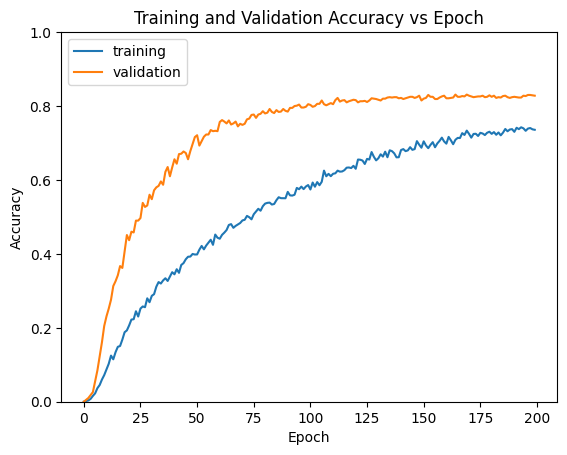

In [ ]:

accuracy = []


for i in range(number_of_repetitions):


  result = load_and_split_data(cross_validation_round = i)

  train_data_images, validation_data_images, test_data_images = result[12:15]

  labels_1 = result[0] # train_data_images_identities_order_by_location
  labels_2 = result[3] # train_data_images_locations_without_order
  train_data_images_identities_order_by_location = labels_1
  train_data_images_locations_without_order = labels_2
  combined_labels_train = labels_2 + labels_1*(number_of_classes_location ** 3)

  labels_1 = result[4] # validation_data_images_identities_order_by_location
  labels_2 = result[7] # validation_data_images_locations_without_order
  validation_data_images_identities_order_by_location = labels_1
  validation_data_images_locations_without_order = labels_2
  combined_labels_validation = labels_2 + labels_1*(number_of_classes_location ** 3)

  labels_1 = result[8] # test_data_images_identities_order_by_location
  labels_2 = result[11] # test_data_images_locations_without_order
  test_data_images_identities_order_by_location = labels_1
  test_data_images_locations_without_order = labels_2
  combined_labels_test = labels_2 + labels_1*(number_of_classes_location ** 3)


  # train the first pathway:

  def CNN_network():
      model = Sequential()

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None,input_shape=(140,140,1)))

      model.add(Conv2D(256,(10,10),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(256,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(128,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Flatten())

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(number_of_classes_identity ** 3,activation='softmax'))

      return model


  CNN_network = CNN_network()
  CNN_network.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

  es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=20, restore_best_weights=True)

  history = CNN_network.fit(train_data_images,train_data_images_identities_order_by_location,validation_data=(validation_data_images,validation_data_images_identities_order_by_location),epochs=200,batch_size=256,shuffle=True, callbacks=[es])

  scores = CNN_network.evaluate(test_data_images,test_data_images_identities_order_by_location)



  # serialize model to JSON
  CNN_network_json = CNN_network.to_json()
  with open(DATA_PATH / "CNN_network_identities_order_by_location.json", "w") as json_file:
      json_file.write(CNN_network_json)

  CNN_network.save(DATA_PATH / "CNN_network_identities_order_by_location_model.h5")
  print("Saved model to disk")

  # train the second pathway:

  def CNN_network():
      model = Sequential()

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None,input_shape=(140,140,1)))

      model.add(Conv2D(256,(10,10),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(256,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(128,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Flatten())

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(number_of_classes_location ** 3,activation='softmax'))

      return model


  CNN_network = CNN_network()
  CNN_network.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

  es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=20, restore_best_weights=True)

  history = CNN_network.fit(train_data_images,train_data_images_locations_without_order,validation_data=(validation_data_images,validation_data_images_locations_without_order),epochs=10,batch_size=256,shuffle=True, callbacks=[es])

  scores = CNN_network.evaluate(test_data_images,test_data_images_locations_without_order)



  # serialize model to JSON
  CNN_network_json = CNN_network.to_json()
  with open(DATA_PATH / "CNN_network_locations_without_order.json", "w") as json_file:
      json_file.write(CNN_network_json)

  CNN_network.save(DATA_PATH / "CNN_network_locations_without_order_model.h5")
  print("Saved model to disk")





  model_1 = load_model(DATA_PATH / 'CNN_network_identities_order_by_location_model.h5')
  model_2 = load_model(DATA_PATH / 'CNN_network_locations_without_order_model.h5')

  layers_1 = model_1.layers
  new_model_1 = tf.keras.models.Sequential(layers_1[:-1])
  layers_2 = model_2.layers
  new_model_2 = tf.keras.models.Sequential(layers_2[:-1])

  new_model_1.trainable = False
  new_model_2.trainable = False

  input = Input(shape=[140, 140, 1])
  y_1 = new_model_1(input)
  y_2 = new_model_2(input)

  common_0 = tf.keras.layers.Concatenate()([y_1,y_2])
  common_1 = tf.keras.layers.Dense(100,activation='relu',kernel_initializer='normal',input_dim=200)(common_0)
  dropout_1 = tf.keras.layers.Dropout(0.30)(common_1)
  common_2 = tf.keras.layers.Dense(100,activation='relu',kernel_initializer='normal')(dropout_1)
  dropout_2 = tf.keras.layers.Dropout(0.30)(common_2)
  common_3 = tf.keras.layers.Dense(100,activation='relu',kernel_initializer='normal')(dropout_2)
  dropout_3 = tf.keras.layers.Dropout(0.30)(common_3)

  output = tf.keras.layers.Dense((number_of_classes_identity ** 3)*(number_of_classes_location ** 3),activation='softmax')(dropout_3)

  model = tf.keras.Model(inputs = input, outputs = output)

  model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

  es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=20, restore_best_weights=True)

  history = model.fit(train_data_images,combined_labels_train,validation_data=(validation_data_images,combined_labels_validation),epochs=200,batch_size=256,shuffle=True, callbacks=[es])

  scores = model.evaluate(test_data_images,combined_labels_test)
  accuracy.append(scores[1])
  print("Accuracy:%.2f%%" %(scores[1]*100))


print(accuracy)


#Plot accuracy vs epoch

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1.0])
plt.xlabel('Epoch')
plt.legend(['training','validation'],loc='upper left')
plt.show()


In [ ]:

print(accuracy)

[0.7789999842643738, 0.7910000085830688, 0.7889999747276306]


## Network two pathways Identity and Orientation (Order by Location)

Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 248ms/step - accuracy: 0.0395 - loss: 3.2973 - val_accuracy: 0.0390 - val_loss: 3.2876
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.0494 - loss: 3.2695 - val_accuracy: 0.0790 - val_loss: 3.1338
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.0891 - loss: 3.0556 - val_accuracy: 0.1840 - val_loss: 2.7259
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.1631 - loss: 2.7209 - val_accuracy: 0.3060 - val_loss: 2.2617
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.2894 - loss: 2.2866 - val_accuracy: 0.4870 - val_loss: 1.8470
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.3757 - loss: 1.8893 - val_accuracy: 0.5620 - val_loss: 1.4891
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.4501 - loss: 1.6714 - val_accuracy: 0.6330 - val_loss: 1.2291
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.5305 - loss: 1.4647 - val_accuracy: 0

Saved model to disk
Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 256ms/step - accuracy: 0.1353 - loss: 2.0832 - val_accuracy: 0.1190 - val_loss: 2.0806
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.1415 - loss: 2.0774 - val_accuracy: 0.1090 - val_loss: 2.0817
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.1458 - loss: 2.0759 - val_accuracy: 0.1330 - val_loss: 2.0797
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.1584 - loss: 2.0698 - val_accuracy: 0.1530 - val_loss: 2.0725
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.1677 - loss: 2.0562 - val_accuracy: 0.2230 - val_loss: 1.9876
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.2411 - loss: 1.9184 - val_accuracy: 0.4110 - val_loss: 1.6017
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.3709 - loss: 1.6229 - val_accuracy: 0.5430 - val_loss: 1.2437
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.4812 - loss: 1.32

Saved model to disk


Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 409ms/step - accuracy: 0.0066 - loss: 5.3902 - val_accuracy: 0.0420 - val_loss: 5.3111
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0152 - loss: 5.3014 - val_accuracy: 0.0540 - val_loss: 5.1563
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0298 - loss: 5.1031 - val_accuracy: 0.1100 - val_loss: 4.6720
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0506 - loss: 4.7132 - val_accuracy: 0.2060 - val_loss: 3.9556
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.1016 - loss: 4.1992 - val_accuracy: 0.3710 - val_loss: 3.1463
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.1554 - loss: 3.6733 - val_accuracy: 0.5360 - val_loss: 2.4696
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.2071 - loss: 3.2202 - val_accuracy: 0.6400 - val_loss: 1.9926
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.2532 - loss: 2.8976 - val_accuracy: 

Saved model to disk
Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 258ms/step - accuracy: 0.1166 - loss: 2.0827 - val_accuracy: 0.1250 - val_loss: 2.0794
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.1522 - loss: 2.0790 - val_accuracy: 0.1130 - val_loss: 2.0796
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.1533 - loss: 2.0764 - val_accuracy: 0.1330 - val_loss: 2.0787
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.1447 - loss: 2.0714 - val_accuracy: 0.1600 - val_loss: 2.0660
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.1728 - loss: 2.0516 - val_accuracy: 0.2540 - val_loss: 1.9071
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.2690 - loss: 1.8515 - val_accuracy: 0.4180 - val_loss: 1.5564
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.4008 - loss: 1.5185 - val_accuracy: 0.5690 - val_loss: 1.1764
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.5036 - loss: 1.25

Saved model to disk


Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 410ms/step - accuracy: 0.0050 - loss: 5.3997 - val_accuracy: 0.0410 - val_loss: 5.3085
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.0164 - loss: 5.2865 - val_accuracy: 0.0630 - val_loss: 5.1265
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0318 - loss: 5.1021 - val_accuracy: 0.1010 - val_loss: 4.6703
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0504 - loss: 4.7357 - val_accuracy: 0.1800 - val_loss: 4.0384
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.1019 - loss: 4.1723 - val_accuracy: 0.3570 - val_loss: 3.2321
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.1442 - loss: 3.6704 - val_accuracy: 0.5040 - val_loss: 2.4657
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.1924 - loss: 3.2835 - val_accuracy: 0.6480 - val_loss: 2.0355
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.2450 - loss: 2.9260 - val_accuracy: 

Saved model to disk
Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 261ms/step - accuracy: 0.1156 - loss: 2.0834 - val_accuracy: 0.1280 - val_loss: 2.0793
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.1265 - loss: 2.0789 - val_accuracy: 0.1290 - val_loss: 2.0792
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.1449 - loss: 2.0768 - val_accuracy: 0.1240 - val_loss: 2.0785
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.1435 - loss: 2.0756 - val_accuracy: 0.1390 - val_loss: 2.0755
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.1547 - loss: 2.0694 - val_accuracy: 0.1850 - val_loss: 2.0313
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.2219 - loss: 1.9787 - val_accuracy: 0.4000 - val_loss: 1.5866
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.3665 - loss: 1.6272 - val_accuracy: 0.5000 - val_loss: 1.3338
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.4684 - loss: 1.36

Saved model to disk


Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 401ms/step - accuracy: 0.0046 - loss: 5.4153 - val_accuracy: 0.0130 - val_loss: 5.3141
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.0160 - loss: 5.2986 - val_accuracy: 0.0390 - val_loss: 5.1740
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.0267 - loss: 5.1314 - val_accuracy: 0.0690 - val_loss: 4.7861
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0401 - loss: 4.8097 - val_accuracy: 0.1520 - val_loss: 4.1851
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0855 - loss: 4.3191 - val_accuracy: 0.3020 - val_loss: 3.4066
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.1322 - loss: 3.8137 - val_accuracy: 0.5010 - val_loss: 2.6701
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.1864 - loss: 3.3046 - val_accuracy: 0.6550 - val_loss: 2.0421
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.2188 - loss: 2.9684 - val_accuracy: 

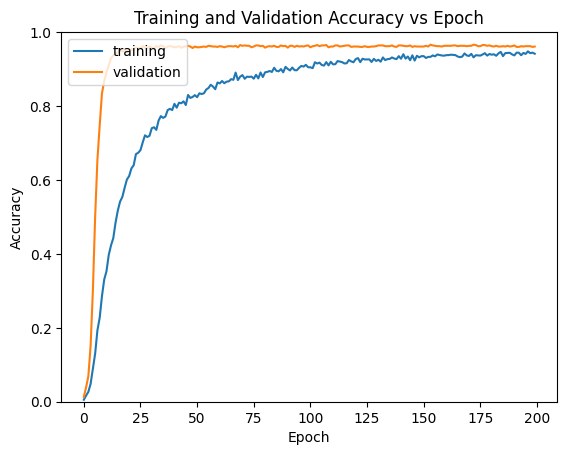

In [ ]:




accuracy = []


for i in range(number_of_repetitions):

  result = load_and_split_data(cross_validation_round = i)

  train_data_images, validation_data_images, test_data_images = result[12:15]

  labels_1 = result[0] # train_data_images_identities_order_by_location
  labels_2 = result[2] # train_data_images_orientations_order_by_location
  train_data_images_identities_order_by_location = labels_1
  train_data_images_orientations_order_by_location = labels_2
  combined_labels_train = labels_2 + labels_1*(number_of_classes_orientation ** 3)

  labels_1 = result[4] # validation_data_images_identities_order_by_location
  labels_2 = result[6] # validation_data_images_orientations_order_by_location
  validation_data_images_identities_order_by_location = labels_1
  validation_data_images_orientations_order_by_location = labels_2
  combined_labels_validation = labels_2 + labels_1*(number_of_classes_orientation ** 3)

  labels_1 = result[8] # test_data_images_identities_order_by_location
  labels_2 = result[10] # test_data_images_orientations_order_by_location
  test_data_images_identities_order_by_location = labels_1
  test_data_images_orientations_order_by_location = labels_2
  combined_labels_test = labels_2 + labels_1*(number_of_classes_orientation ** 3)

  # train the first pathway:

  def CNN_network():
      model = Sequential()

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None,input_shape=(140,140,1)))

      model.add(Conv2D(256,(10,10),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(256,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(128,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Flatten())

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(number_of_classes_identity ** 3,activation='softmax'))

      return model


  CNN_network = CNN_network()
  CNN_network.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

  es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=20, restore_best_weights=True)

  history = CNN_network.fit(train_data_images,train_data_images_identities_order_by_location,validation_data=(validation_data_images,validation_data_images_identities_order_by_location),epochs=200,batch_size=256,shuffle=True, callbacks=[es])

  scores = CNN_network.evaluate(test_data_images,test_data_images_identities_order_by_location)



  # serialize model to JSON
  CNN_network_json = CNN_network.to_json()
  with open(DATA_PATH / "CNN_network_identities_order_by_location.json", "w") as json_file:
      json_file.write(CNN_network_json)

  CNN_network.save(DATA_PATH / "CNN_network_identities_order_by_location_model.h5")
  print("Saved model to disk")

  # train the second pathway:


  def CNN_network():
      model = Sequential()

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None,input_shape=(140,140,1)))

      model.add(Conv2D(256,(10,10),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(256,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(128,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Flatten())

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(number_of_classes_orientation ** 3,activation='softmax'))

      return model


  CNN_network = CNN_network()
  CNN_network.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

  es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=20, restore_best_weights=True)

  history = CNN_network.fit(train_data_images,train_data_images_orientations_order_by_location,validation_data=(validation_data_images,validation_data_images_orientations_order_by_location),epochs=200,batch_size=256,shuffle=True, callbacks=[es])

  scores = CNN_network.evaluate(test_data_images,test_data_images_orientations_order_by_location)



  # serialize model to JSON
  CNN_network_json = CNN_network.to_json()
  with open(DATA_PATH / "CNN_network_orientations_order_by_location.json", "w") as json_file:
      json_file.write(CNN_network_json)

  CNN_network.save(DATA_PATH / "CNN_network_orientations_order_by_location_model.h5")
  print("Saved model to disk")




  model_1 = load_model(DATA_PATH / 'CNN_network_identities_order_by_location_model.h5')
  model_2 = load_model(DATA_PATH / 'CNN_network_orientations_order_by_location_model.h5')

  layers_1 = model_1.layers
  new_model_1 = tf.keras.models.Sequential(layers_1[:-1])
  layers_2 = model_2.layers
  new_model_2 = tf.keras.models.Sequential(layers_2[:-1])

  new_model_1.trainable = False
  new_model_2.trainable = False

  input = Input(shape=[140, 140, 1])
  y_1 = new_model_1(input)
  y_2 = new_model_2(input)

  common_0 = tf.keras.layers.Concatenate()([y_1,y_2])
  common_1 = tf.keras.layers.Dense(100,activation='relu',kernel_initializer='normal',input_dim=200)(common_0)
  dropout_1 = tf.keras.layers.Dropout(0.30)(common_1)
  common_2 = tf.keras.layers.Dense(100,activation='relu',kernel_initializer='normal')(dropout_1)
  dropout_2 = tf.keras.layers.Dropout(0.30)(common_2)
  common_3 = tf.keras.layers.Dense(100,activation='relu',kernel_initializer='normal')(dropout_2)
  dropout_3 = tf.keras.layers.Dropout(0.30)(common_3)

  output = tf.keras.layers.Dense((number_of_classes_identity ** 3)*(number_of_classes_orientation ** 3),activation='softmax')(dropout_3)

  model = tf.keras.Model(inputs = input, outputs = output)

  model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

  es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=20, restore_best_weights=True)

  history = model.fit(train_data_images,combined_labels_train,validation_data=(validation_data_images,combined_labels_validation),epochs=200,batch_size=256,shuffle=True, callbacks=[es])

  scores = model.evaluate(test_data_images,combined_labels_test)
  accuracy.append(scores[1])
  print("Accuracy:%.2f%%" %(scores[1]*100))


print(accuracy)

#Plot accuracy vs epoch

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1.0])
plt.xlabel('Epoch')
plt.legend(['training','validation'],loc='upper left')
plt.show()


In [ ]:

print(accuracy)

[0.949999988079071, 0.9629999995231628, 0.9589999914169312]


## Network two pathways Orientation and Location (Order by Location)

Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 262ms/step - accuracy: 0.1196 - loss: 2.0836 - val_accuracy: 0.1180 - val_loss: 2.0801
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.1400 - loss: 2.0782 - val_accuracy: 0.1190 - val_loss: 2.0822
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.1316 - loss: 2.0778 - val_accuracy: 0.1210 - val_loss: 2.0806
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.1430 - loss: 2.0740 - val_accuracy: 0.1520 - val_loss: 2.0701
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.1833 - loss: 2.0486 - val_accuracy: 0.2690 - val_loss: 1.9219
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.2745 - loss: 1.8547 - val_accuracy: 0.4160 - val_loss: 1.5560
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.3931 - loss: 1.5590 - val_accuracy: 0.5740 - val_loss: 1.1632
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.5179 - loss: 1.2337 - val_accuracy: 0

Saved model to disk
Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 332ms/step - accuracy: 0.0171 - loss: 6.1918 - val_accuracy: 0.2410 - val_loss: 3.3589
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.1819 - loss: 3.5644 - val_accuracy: 0.8670 - val_loss: 0.9591
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.4905 - loss: 1.7784 - val_accuracy: 0.9910 - val_loss: 0.1270
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.7327 - loss: 0.8657 - val_accuracy: 0.9990 - val_loss: 0.0245
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8435 - loss: 0.5344 - val_accuracy: 1.0000 - val_loss: 0.0061
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8871 - loss: 0.3512 - val_accuracy: 1.0000 - val_loss: 8.4654e-04
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9242 - loss: 0.2492 - val_accuracy: 1.0000 - val_loss: 3.7100e-04
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9453 - loss: 0.1

Saved model to disk


Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 23s 922ms/step - accuracy: 0.0013 - loss: 8.5197 - val_accuracy: 0.0020 - val_loss: 7.0554
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0036 - loss: 6.8862 - val_accuracy: 0.0120 - val_loss: 6.6514
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0079 - loss: 6.4401 - val_accuracy: 0.0320 - val_loss: 6.1678
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0265 - loss: 6.0927 - val_accuracy: 0.0730 - val_loss: 5.5588
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0312 - loss: 5.5175 - val_accuracy: 0.1400 - val_loss: 4.6630
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0582 - loss: 4.9052 - val_accuracy: 0.2400 - val_loss: 3.8478
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0940 - loss: 4.4369 - val_accuracy: 0.3010 - val_loss: 3.2054
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.1044 - loss: 4.0388 - val_accuracy: 

Saved model to disk
Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 330ms/step - accuracy: 0.0194 - loss: 6.1263 - val_accuracy: 0.2760 - val_loss: 3.1462
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.1943 - loss: 3.4162 - val_accuracy: 0.9130 - val_loss: 0.7800
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.5244 - loss: 1.6384 - val_accuracy: 0.9950 - val_loss: 0.0863
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.7397 - loss: 0.8238 - val_accuracy: 0.9990 - val_loss: 0.0125
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8559 - loss: 0.4632 - val_accuracy: 1.0000 - val_loss: 0.0026
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9081 - loss: 0.2671 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9401 - loss: 0.1982 - val_accuracy: 1.0000 - val_loss: 1.6931e-04
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9499 - loss: 0.1520 -

Saved model to disk


Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 422ms/step - accuracy: 0.0011 - loss: 8.5058 - val_accuracy: 0.0050 - val_loss: 7.0400
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0039 - loss: 6.8586 - val_accuracy: 0.0140 - val_loss: 6.5469
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0056 - loss: 6.3881 - val_accuracy: 0.0460 - val_loss: 6.0254
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0227 - loss: 5.9845 - val_accuracy: 0.1060 - val_loss: 5.2784
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0316 - loss: 5.4060 - val_accuracy: 0.1760 - val_loss: 4.3065
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0717 - loss: 4.7301 - val_accuracy: 0.2670 - val_loss: 3.5416
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.1152 - loss: 4.1943 - val_accuracy: 0.3370 - val_loss: 2.9510
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.1232 - loss: 3.8545 - val_accuracy: 

Saved model to disk
Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 328ms/step - accuracy: 0.0226 - loss: 6.0738 - val_accuracy: 0.3250 - val_loss: 3.4006
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.2026 - loss: 3.3051 - val_accuracy: 0.8920 - val_loss: 0.7883
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.5384 - loss: 1.5750 - val_accuracy: 0.9890 - val_loss: 0.1182
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.7429 - loss: 0.8105 - val_accuracy: 0.9960 - val_loss: 0.0316
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8548 - loss: 0.4862 - val_accuracy: 1.0000 - val_loss: 0.0087
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9051 - loss: 0.2811 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9196 - loss: 0.2325 - val_accuracy: 1.0000 - val_loss: 3.3754e-04
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9394 - loss: 0.1811 -

Saved model to disk


Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 436ms/step - accuracy: 0.0011 - loss: 8.5127 - val_accuracy: 0.0010 - val_loss: 7.0435
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.0035 - loss: 6.8438 - val_accuracy: 0.0150 - val_loss: 6.6504
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0058 - loss: 6.4256 - val_accuracy: 0.0210 - val_loss: 6.2015
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0198 - loss: 6.0675 - val_accuracy: 0.0740 - val_loss: 5.6025
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0448 - loss: 5.5434 - val_accuracy: 0.1620 - val_loss: 4.7837
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0619 - loss: 4.9850 - val_accuracy: 0.3020 - val_loss: 3.9978
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0898 - loss: 4.4702 - val_accuracy: 0.3460 - val_loss: 3.3473
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.1158 - loss: 4.0463 - val_accuracy: 

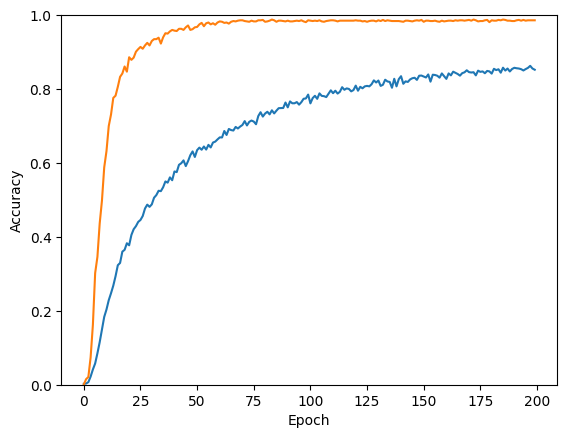

In [ ]:

accuracy = []


for i in range(number_of_repetitions):


  result = load_and_split_data(cross_validation_round = i)

  train_data_images, validation_data_images, test_data_images = result[12:15]

  labels_1 = result[2] # train_data_images_orientations_order_by_location
  labels_2 = result[3] # train_data_images_locations_without_order
  train_data_images_orientations_order_by_location = labels_1
  train_data_images_locations_without_order = labels_2
  combined_labels_train = labels_2 + labels_1*(number_of_classes_location ** 3)

  labels_1 = result[6] # validation_data_images_orientations_order_by_location
  labels_2 = result[7] # validation_data_images_locations_without_order
  validation_data_images_orientations_order_by_location = labels_1
  validation_data_images_locations_without_order = labels_2
  combined_labels_validation = labels_2 + labels_1*(number_of_classes_location ** 3)

  labels_1 = result[10] # test_data_images_orientations_order_by_location
  labels_2 = result[11] # test_data_images_locations_without_order
  test_data_images_orientations_order_by_location = labels_1
  test_data_images_locations_without_order = labels_2
  combined_labels_test = labels_2 + labels_1*(number_of_classes_location ** 3)

  # train the first pathway:

  def CNN_network():
      model = Sequential()

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None,input_shape=(140,140,1)))

      model.add(Conv2D(256,(10,10),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(256,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(128,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Flatten())

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(number_of_classes_orientation ** 3,activation='softmax'))

      return model


  CNN_network = CNN_network()
  CNN_network.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

  es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=20, restore_best_weights=True)

  history = CNN_network.fit(train_data_images,train_data_images_orientations_order_by_location,validation_data=(validation_data_images,validation_data_images_orientations_order_by_location),epochs=200,batch_size=256,shuffle=True, callbacks=[es])

  scores = CNN_network.evaluate(test_data_images,test_data_images_orientations_order_by_location)



  # serialize model to JSON
  CNN_network_json = CNN_network.to_json()
  with open(DATA_PATH / "CNN_network_orientations_order_by_location.json", "w") as json_file:
      json_file.write(CNN_network_json)

  CNN_network.save(DATA_PATH / "CNN_network_orientations_order_by_location_model.h5")
  print("Saved model to disk")

  # train the second pathway:

  def CNN_network():
      model = Sequential()

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None,input_shape=(140,140,1)))

      model.add(Conv2D(256,(10,10),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(256,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(128,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Flatten())

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(number_of_classes_location ** 3,activation='softmax'))

      return model


  CNN_network = CNN_network()
  CNN_network.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

  es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=20, restore_best_weights=True)

  history = CNN_network.fit(train_data_images,train_data_images_locations_without_order,validation_data=(validation_data_images,validation_data_images_locations_without_order),epochs=10,batch_size=256,shuffle=True, callbacks=[es])

  scores = CNN_network.evaluate(test_data_images,test_data_images_locations_without_order)



  # serialize model to JSON
  CNN_network_json = CNN_network.to_json()
  with open(DATA_PATH / "CNN_network_locations_without_order.json", "w") as json_file:
      json_file.write(CNN_network_json)

  CNN_network.save(DATA_PATH / "CNN_network_locations_without_order_model.h5")
  print("Saved model to disk")





  model_1 = load_model(DATA_PATH / 'CNN_network_orientations_order_by_location_model.h5')
  model_2 = load_model(DATA_PATH / 'CNN_network_locations_without_order_model.h5')

  layers_1 = model_1.layers
  new_model_1 = tf.keras.models.Sequential(layers_1[:-1])
  layers_2 = model_2.layers
  new_model_2 = tf.keras.models.Sequential(layers_2[:-1])

  new_model_1.trainable = False
  new_model_2.trainable = False

  input = Input(shape=[140, 140, 1])
  y_1 = new_model_1(input)
  y_2 = new_model_2(input)

  common_0 = tf.keras.layers.Concatenate()([y_1,y_2])
  common_1 = tf.keras.layers.Dense(100,activation='relu',kernel_initializer='normal',input_dim=200)(common_0)
  dropout_1 = tf.keras.layers.Dropout(0.30)(common_1)
  common_2 = tf.keras.layers.Dense(100,activation='relu',kernel_initializer='normal')(dropout_1)
  dropout_2 = tf.keras.layers.Dropout(0.30)(common_2)
  common_3 = tf.keras.layers.Dense(100,activation='relu',kernel_initializer='normal')(dropout_2)
  dropout_3 = tf.keras.layers.Dropout(0.30)(common_3)

  output = tf.keras.layers.Dense((number_of_classes_orientation ** 3)*(number_of_classes_location ** 3),activation='softmax')(dropout_3)

  model = tf.keras.Model(inputs = input, outputs = output)

  model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

  es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=20, restore_best_weights=True)

  history = model.fit(train_data_images,combined_labels_train,validation_data=(validation_data_images,combined_labels_validation),epochs=200,batch_size=256,shuffle=True, callbacks=[es])

  scores = model.evaluate(test_data_images,combined_labels_test)
  accuracy.append(scores[1])
  print("Accuracy:%.2f%%" %(scores[1]*100))


print(accuracy)



#Plot accuracy vs epoch

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
# plt.title('Training and Validation Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1.0])
plt.xlabel('Epoch')
# plt.legend(['training','validation'],loc='upper left')
plt.show()

In [ ]:

print(accuracy)

[0.9909999966621399, 0.9890000224113464, 0.984000027179718]


## Network two pathways Illuminance and Orientation (Order by Location)

Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 263ms/step - accuracy: 0.1985 - loss: 2.0288 - val_accuracy: 0.2730 - val_loss: 1.9397
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.2720 - loss: 1.9243 - val_accuracy: 0.2730 - val_loss: 1.8328
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.2648 - loss: 1.8411 - val_accuracy: 0.3030 - val_loss: 1.6910
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.3445 - loss: 1.6539 - val_accuracy: 0.5040 - val_loss: 1.4135
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.4805 - loss: 1.3946 - val_accuracy: 0.6030 - val_loss: 1.2398
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.5377 - loss: 1.2823 - val_accuracy: 0.6190 - val_loss: 1.1282
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.6012 - loss: 1.1216 - val_accuracy: 0.6700 - val_loss: 0.9326
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.6261 - loss: 1.0380 - val_accuracy: 0

Saved model to disk
Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 257ms/step - accuracy: 0.1230 - loss: 2.0828 - val_accuracy: 0.1210 - val_loss: 2.0796
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.1397 - loss: 2.0790 - val_accuracy: 0.1190 - val_loss: 2.0801
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.1297 - loss: 2.0774 - val_accuracy: 0.1190 - val_loss: 2.0794
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.1538 - loss: 2.0744 - val_accuracy: 0.1470 - val_loss: 2.0742
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.1820 - loss: 2.0583 - val_accuracy: 0.2110 - val_loss: 2.0076
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.2329 - loss: 1.9358 - val_accuracy: 0.4520 - val_loss: 1.5340
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.3955 - loss: 1.5846 - val_accuracy: 0.5840 - val_loss: 1.1826
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.5163 - loss: 1.23

Saved model to disk


Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 803ms/step - accuracy: 0.0468 - loss: 4.0747 - val_accuracy: 0.1880 - val_loss: 3.4757
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.1197 - loss: 3.4777 - val_accuracy: 0.3750 - val_loss: 2.6320
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2406 - loss: 2.8012 - val_accuracy: 0.5630 - val_loss: 1.9634
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3497 - loss: 2.2930 - val_accuracy: 0.6880 - val_loss: 1.4415
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4627 - loss: 1.8559 - val_accuracy: 0.7430 - val_loss: 1.0829
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5380 - loss: 1.5314 - val_accuracy: 0.8000 - val_loss: 0.8401
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6121 - loss: 1.2643 - val_accuracy: 0.8260 - val_loss: 0.6715
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6719 - loss: 1.0801 - val_accuracy: 

Saved model to disk
Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 256ms/step - accuracy: 0.1298 - loss: 2.0811 - val_accuracy: 0.1420 - val_loss: 2.0788
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.1258 - loss: 2.0779 - val_accuracy: 0.1510 - val_loss: 2.0790
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.1358 - loss: 2.0786 - val_accuracy: 0.1300 - val_loss: 2.0792
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.1427 - loss: 2.0769 - val_accuracy: 0.1170 - val_loss: 2.0795
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.1589 - loss: 2.0690 - val_accuracy: 0.1390 - val_loss: 2.0732
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.1686 - loss: 2.0529 - val_accuracy: 0.2470 - val_loss: 1.9702
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.2546 - loss: 1.9037 - val_accuracy: 0.4010 - val_loss: 1.6166
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.4104 - loss: 1.52

Saved model to disk


Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 402ms/step - accuracy: 0.0423 - loss: 4.0887 - val_accuracy: 0.1520 - val_loss: 3.6423
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.1074 - loss: 3.6125 - val_accuracy: 0.2870 - val_loss: 2.8838
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2199 - loss: 2.9802 - val_accuracy: 0.5270 - val_loss: 2.1043
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3364 - loss: 2.4312 - val_accuracy: 0.6620 - val_loss: 1.4892
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4383 - loss: 1.9468 - val_accuracy: 0.7800 - val_loss: 1.0035
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5226 - loss: 1.5793 - val_accuracy: 0.8390 - val_loss: 0.7435
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.6093 - loss: 1.2729 - val_accuracy: 0.8630 - val_loss: 0.6005
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6543 - loss: 1.0953 - val_accuracy: 

Saved model to disk
Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 259ms/step - accuracy: 0.1319 - loss: 2.0815 - val_accuracy: 0.1400 - val_loss: 2.0769
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.1160 - loss: 2.0800 - val_accuracy: 0.1380 - val_loss: 2.0797
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.1388 - loss: 2.0778 - val_accuracy: 0.1510 - val_loss: 2.0765
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.1466 - loss: 2.0745 - val_accuracy: 0.1540 - val_loss: 2.0692
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.1602 - loss: 2.0622 - val_accuracy: 0.1820 - val_loss: 2.0529
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.2034 - loss: 2.0120 - val_accuracy: 0.3370 - val_loss: 1.7890
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.3206 - loss: 1.7332 - val_accuracy: 0.4720 - val_loss: 1.4341
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.4524 - loss: 1.41

Saved model to disk


Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 395ms/step - accuracy: 0.0341 - loss: 4.0938 - val_accuracy: 0.0740 - val_loss: 3.5101
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.1002 - loss: 3.5706 - val_accuracy: 0.3290 - val_loss: 2.7879
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.1999 - loss: 3.0416 - val_accuracy: 0.5680 - val_loss: 2.0569
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3203 - loss: 2.4803 - val_accuracy: 0.6990 - val_loss: 1.4885
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4216 - loss: 2.0529 - val_accuracy: 0.7900 - val_loss: 1.0749
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5028 - loss: 1.6919 - val_accuracy: 0.8340 - val_loss: 0.7550
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5723 - loss: 1.4031 - val_accuracy: 0.8690 - val_loss: 0.5838
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6408 - loss: 1.1734 - val_accuracy: 

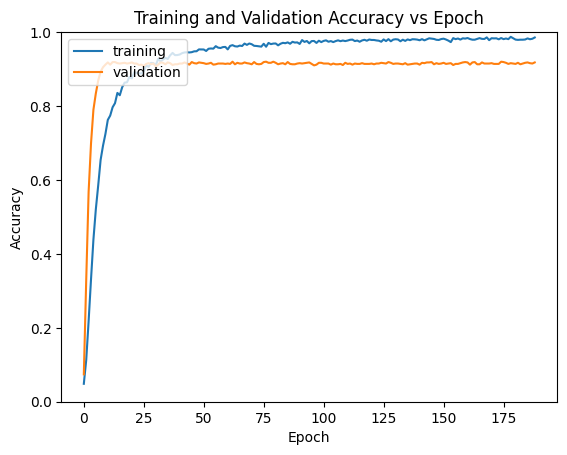

In [ ]:

accuracy = []


for i in range(number_of_repetitions):


  result = load_and_split_data(cross_validation_round = i)

  train_data_images, validation_data_images, test_data_images = result[12:15]

  labels_1 = result[1] # train_data_images_illuminance_order_by_location
  labels_2 = result[2] # train_data_images_orientations_order_by_location
  train_data_images_illuminance_order_by_location = labels_1
  train_data_images_orientations_order_by_location = labels_2
  combined_labels_train = labels_2 + labels_1*(number_of_classes_orientation ** 3)

  labels_1 = result[5] # validation_data_images_illuminance_order_by_location
  labels_2 = result[6] # validation_data_images_orientations_order_by_location
  validation_data_images_illuminance_order_by_location = labels_1
  validation_data_images_orientations_order_by_location = labels_2
  combined_labels_validation = labels_2 + labels_1*(number_of_classes_orientation ** 3)

  labels_1 = result[9] # test_data_images_illuminance_order_by_location
  labels_2 = result[10] # test_data_images_orientations_order_by_location
  test_data_images_illuminance_order_by_location = labels_1
  test_data_images_orientations_order_by_location = labels_2
  combined_labels_test = labels_2 + labels_1*(number_of_classes_orientation ** 3)

  # train the first pathway:

  def CNN_network():
      model = Sequential()

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None,input_shape=(140,140,1)))

      model.add(Conv2D(256,(10,10),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(256,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(128,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Flatten())

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(number_of_classes_illuminance ** 3,activation='softmax'))

      return model


  CNN_network = CNN_network()
  CNN_network.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

  es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=20, restore_best_weights=True)

  history = CNN_network.fit(train_data_images,train_data_images_illuminance_order_by_location,validation_data=(validation_data_images,validation_data_images_illuminance_order_by_location),epochs=200,batch_size=256,shuffle=True, callbacks=[es])

  scores = CNN_network.evaluate(test_data_images,test_data_images_illuminance_order_by_location)



  # serialize model to JSON
  CNN_network_json = CNN_network.to_json()
  with open(DATA_PATH / "CNN_network_illuminance_order_by_location.json", "w") as json_file:
      json_file.write(CNN_network_json)

  CNN_network.save(DATA_PATH / "CNN_network_illuminance_order_by_location_model.h5")
  print("Saved model to disk")

  # train the second pathway:

  def CNN_network():
      model = Sequential()

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None,input_shape=(140,140,1)))

      model.add(Conv2D(256,(10,10),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(256,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(128,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Flatten())

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(number_of_classes_orientation ** 3,activation='softmax'))

      return model


  CNN_network = CNN_network()
  CNN_network.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

  es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=20, restore_best_weights=True)

  history = CNN_network.fit(train_data_images,train_data_images_orientations_order_by_location,validation_data=(validation_data_images,validation_data_images_orientations_order_by_location),epochs=200,batch_size=256,shuffle=True, callbacks=[es])

  scores = CNN_network.evaluate(test_data_images,test_data_images_orientations_order_by_location)



  # serialize model to JSON
  CNN_network_json = CNN_network.to_json()
  with open(DATA_PATH / "CNN_network_orientations_order_by_location.json", "w") as json_file:
      json_file.write(CNN_network_json)

  CNN_network.save(DATA_PATH / "CNN_network_orientations_order_by_location_model.h5")
  print("Saved model to disk")





  model_1 = load_model(DATA_PATH / 'CNN_network_illuminance_order_by_location_model.h5')
  model_2 = load_model(DATA_PATH / 'CNN_network_orientations_order_by_location_model.h5')

  layers_1 = model_1.layers
  new_model_1 = tf.keras.models.Sequential(layers_1[:-1])
  layers_2 = model_2.layers
  new_model_2 = tf.keras.models.Sequential(layers_2[:-1])

  new_model_1.trainable = False
  new_model_2.trainable = False

  input = Input(shape=[140, 140, 1])
  y_1 = new_model_1(input)
  y_2 = new_model_2(input)

  common_0 = tf.keras.layers.Concatenate()([y_1,y_2])
  common_1 = tf.keras.layers.Dense(100,activation='relu',kernel_initializer='normal',input_dim=200)(common_0)
  dropout_1 = tf.keras.layers.Dropout(0.30)(common_1)
  common_2 = tf.keras.layers.Dense(100,activation='relu',kernel_initializer='normal')(dropout_1)
  dropout_2 = tf.keras.layers.Dropout(0.30)(common_2)
  common_3 = tf.keras.layers.Dense(100,activation='relu',kernel_initializer='normal')(dropout_2)
  dropout_3 = tf.keras.layers.Dropout(0.30)(common_3)

  output = tf.keras.layers.Dense((number_of_classes_illuminance ** 3)*(number_of_classes_orientation ** 3),activation='softmax')(dropout_3)

  model = tf.keras.Model(inputs = input, outputs = output)

  model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

  es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=20, restore_best_weights=True)

  history = model.fit(train_data_images,combined_labels_train,validation_data=(validation_data_images,combined_labels_validation),epochs=200,batch_size=256,shuffle=True, callbacks=[es])

  scores = model.evaluate(test_data_images,combined_labels_test)
  accuracy.append(scores[1])
  print("Accuracy:%.2f%%" %(scores[1]*100))


print(accuracy)


#Plot accuracy vs epoch

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1.0])
plt.xlabel('Epoch')
plt.legend(['training','validation'],loc='upper left')
plt.show()


In [ ]:

print(accuracy)

[0.9070000052452087, 0.9229999780654907, 0.9229999780654907]


## Network two pathways Illuminance and Location (Order by Location)

Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 264ms/step - accuracy: 0.2449 - loss: 2.0251 - val_accuracy: 0.2730 - val_loss: 1.9501
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.2630 - loss: 1.9259 - val_accuracy: 0.2730 - val_loss: 1.8161
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.2918 - loss: 1.7878 - val_accuracy: 0.3720 - val_loss: 1.7497
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.3597 - loss: 1.6373 - val_accuracy: 0.5170 - val_loss: 1.4028
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.4675 - loss: 1.4376 - val_accuracy: 0.5370 - val_loss: 1.3067
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.5366 - loss: 1.2912 - val_accuracy: 0.5640 - val_loss: 1.1890
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.5731 - loss: 1.1542 - val_accuracy: 0.6780 - val_loss: 0.9684
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.6373 - loss: 1.0071 - val_accuracy: 0

Saved model to disk
Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 331ms/step - accuracy: 0.0153 - loss: 6.1427 - val_accuracy: 0.2500 - val_loss: 3.2662
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.1797 - loss: 3.5285 - val_accuracy: 0.8510 - val_loss: 1.0063
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.5026 - loss: 1.7473 - val_accuracy: 0.9920 - val_loss: 0.1400
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.7335 - loss: 0.8886 - val_accuracy: 0.9990 - val_loss: 0.0194
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8264 - loss: 0.5434 - val_accuracy: 1.0000 - val_loss: 0.0041
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8961 - loss: 0.3253 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9282 - loss: 0.2239 - val_accuracy: 1.0000 - val_loss: 2.7299e-04
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9400 - loss: 0.1819 -

Saved model to disk


Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 427ms/step - accuracy: 0.0024 - loss: 8.4498 - val_accuracy: 0.0120 - val_loss: 6.7993
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.0071 - loss: 6.6562 - val_accuracy: 0.0310 - val_loss: 6.3789
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0116 - loss: 6.2261 - val_accuracy: 0.0600 - val_loss: 5.9448
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0232 - loss: 5.9000 - val_accuracy: 0.1120 - val_loss: 5.3462
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0487 - loss: 5.4153 - val_accuracy: 0.2090 - val_loss: 4.6302
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0886 - loss: 4.7948 - val_accuracy: 0.3050 - val_loss: 3.8471
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.1119 - loss: 4.3820 - val_accuracy: 0.3640 - val_loss: 3.3088
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.1400 - loss: 3.9043 - val_accuracy: 

Saved model to disk
Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 371ms/step - accuracy: 0.0195 - loss: 6.1165 - val_accuracy: 0.2420 - val_loss: 3.3368
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.1566 - loss: 3.6290 - val_accuracy: 0.8670 - val_loss: 1.1791
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.4701 - loss: 1.8586 - val_accuracy: 0.9960 - val_loss: 0.1052
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.7300 - loss: 0.8592 - val_accuracy: 1.0000 - val_loss: 0.0120
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8604 - loss: 0.4587 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9088 - loss: 0.2880 - val_accuracy: 1.0000 - val_loss: 2.1569e-04
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9349 - loss: 0.2040 - val_accuracy: 1.0000 - val_loss: 2.4857e-04
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9432 - loss: 0.1

Saved model to disk


Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 437ms/step - accuracy: 0.0011 - loss: 8.4621 - val_accuracy: 0.0100 - val_loss: 6.8658
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.0054 - loss: 6.7017 - val_accuracy: 0.0160 - val_loss: 6.4149
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0097 - loss: 6.2066 - val_accuracy: 0.0690 - val_loss: 6.0271
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0238 - loss: 5.8330 - val_accuracy: 0.1150 - val_loss: 5.4275
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0440 - loss: 5.4007 - val_accuracy: 0.1800 - val_loss: 4.6898
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0767 - loss: 4.8474 - val_accuracy: 0.2410 - val_loss: 4.0004
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.1131 - loss: 4.3200 - val_accuracy: 0.3330 - val_loss: 3.4536
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.1343 - loss: 3.9301 - val_accuracy: 

Saved model to disk
Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 335ms/step - accuracy: 0.0161 - loss: 6.1562 - val_accuracy: 0.2820 - val_loss: 3.6983
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.1656 - loss: 3.6119 - val_accuracy: 0.8360 - val_loss: 1.3231
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.4827 - loss: 1.8297 - val_accuracy: 0.9880 - val_loss: 0.1508
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.7258 - loss: 0.8972 - val_accuracy: 0.9970 - val_loss: 0.0245
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8294 - loss: 0.5249 - val_accuracy: 0.9990 - val_loss: 0.0090
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8916 - loss: 0.3240 - val_accuracy: 0.9990 - val_loss: 0.0048
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9215 - loss: 0.2461 - val_accuracy: 1.0000 - val_loss: 5.0785e-04
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9452 - loss: 0.1607 -

Saved model to disk


Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 433ms/step - accuracy: 6.1853e-04 - loss: 8.4664 - val_accuracy: 0.0090 - val_loss: 6.7477
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0073 - loss: 6.7201 - val_accuracy: 0.0170 - val_loss: 6.3278
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0102 - loss: 6.2330 - val_accuracy: 0.0740 - val_loss: 5.8255
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0191 - loss: 5.8707 - val_accuracy: 0.1380 - val_loss: 5.1762
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0378 - loss: 5.3518 - val_accuracy: 0.2080 - val_loss: 4.4932
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0709 - loss: 4.8306 - val_accuracy: 0.2810 - val_loss: 3.7542
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0958 - loss: 4.4014 - val_accuracy: 0.3230 - val_loss: 3.1982
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.1154 - loss: 4.0303 - val_accura

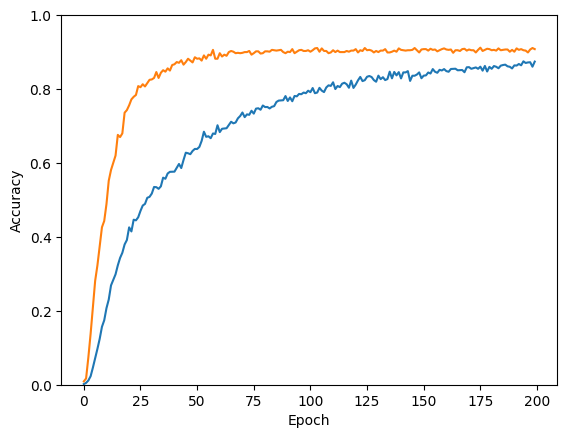

In [ ]:

accuracy = []


for i in range(number_of_repetitions):


  result = load_and_split_data(cross_validation_round = i)

  train_data_images, validation_data_images, test_data_images = result[12:15]

  labels_1 = result[1] # train_data_images_illuminance_order_by_location
  labels_2 = result[3] # train_data_images_locations_without_order
  train_data_images_illuminance_order_by_location = labels_1
  train_data_images_locations_without_order = labels_2
  combined_labels_train = labels_2 + labels_1*(number_of_classes_location ** 3)

  labels_1 = result[5] # validation_data_images_illuminance_order_by_location
  labels_2 = result[7] # validation_data_images_locations_without_order
  validation_data_images_illuminance_order_by_location = labels_1
  validation_data_images_locations_without_order = labels_2
  combined_labels_validation = labels_2 + labels_1*(number_of_classes_location ** 3)

  labels_1 = result[9] # test_data_images_illuminance_order_by_location
  labels_2 = result[11] # test_data_images_locations_without_order
  test_data_images_illuminance_order_by_location = labels_1
  test_data_images_locations_without_order = labels_2
  combined_labels_test = labels_2 + labels_1*(number_of_classes_location ** 3)


  # train the first pathway:

  def CNN_network():
      model = Sequential()

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None,input_shape=(140,140,1)))

      model.add(Conv2D(256,(10,10),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(256,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(128,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Flatten())

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(number_of_classes_illuminance ** 3,activation='softmax'))

      return model


  CNN_network = CNN_network()
  CNN_network.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

  es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=20, restore_best_weights=True)

  history = CNN_network.fit(train_data_images,train_data_images_illuminance_order_by_location,validation_data=(validation_data_images,validation_data_images_illuminance_order_by_location),epochs=200,batch_size=256,shuffle=True, callbacks=[es])

  scores = CNN_network.evaluate(test_data_images,test_data_images_illuminance_order_by_location)



  # serialize model to JSON
  CNN_network_json = CNN_network.to_json()
  with open(DATA_PATH / "CNN_network_illuminance_order_by_location.json", "w") as json_file:
      json_file.write(CNN_network_json)

  CNN_network.save(DATA_PATH / "CNN_network_illuminance_order_by_location_model.h5")
  print("Saved model to disk")

  # train the second pathway:

  def CNN_network():
      model = Sequential()

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None,input_shape=(140,140,1)))

      model.add(Conv2D(256,(10,10),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(256,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(128,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Flatten())

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(number_of_classes_location ** 3,activation='softmax'))

      return model


  CNN_network = CNN_network()
  CNN_network.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

  es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=20, restore_best_weights=True)

  history = CNN_network.fit(train_data_images,train_data_images_locations_without_order,validation_data=(validation_data_images,validation_data_images_locations_without_order),epochs=10,batch_size=256,shuffle=True, callbacks=[es])

  scores = CNN_network.evaluate(test_data_images,test_data_images_locations_without_order)



  # serialize model to JSON
  CNN_network_json = CNN_network.to_json()
  with open(DATA_PATH / "CNN_network_locations_without_order.json", "w") as json_file:
      json_file.write(CNN_network_json)

  CNN_network.save(DATA_PATH / "CNN_network_locations_without_order_model.h5")
  print("Saved model to disk")





  model_1 = load_model(DATA_PATH / 'CNN_network_illuminance_order_by_location_model.h5')
  model_2 = load_model(DATA_PATH / 'CNN_network_locations_without_order_model.h5')

  layers_1 = model_1.layers
  new_model_1 = tf.keras.models.Sequential(layers_1[:-1])
  layers_2 = model_2.layers
  new_model_2 = tf.keras.models.Sequential(layers_2[:-1])

  new_model_1.trainable = False
  new_model_2.trainable = False

  input = Input(shape=[140, 140, 1])
  y_1 = new_model_1(input)
  y_2 = new_model_2(input)

  common_0 = tf.keras.layers.Concatenate()([y_1,y_2])
  common_1 = tf.keras.layers.Dense(100,activation='relu',kernel_initializer='normal',input_dim=200)(common_0)
  dropout_1 = tf.keras.layers.Dropout(0.30)(common_1)
  common_2 = tf.keras.layers.Dense(100,activation='relu',kernel_initializer='normal')(dropout_1)
  dropout_2 = tf.keras.layers.Dropout(0.30)(common_2)
  common_3 = tf.keras.layers.Dense(100,activation='relu',kernel_initializer='normal')(dropout_2)
  dropout_3 = tf.keras.layers.Dropout(0.30)(common_3)

  output = tf.keras.layers.Dense((number_of_classes_illuminance ** 3)*(number_of_classes_location ** 3),activation='softmax')(dropout_3)

  model = tf.keras.Model(inputs = input, outputs = output)

  model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

  es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=20, restore_best_weights=True)

  history = model.fit(train_data_images,combined_labels_train,validation_data=(validation_data_images,combined_labels_validation),epochs=200,batch_size=256,shuffle=True, callbacks=[es])

  scores = model.evaluate(test_data_images,combined_labels_test)
  accuracy.append(scores[1])
  print("Accuracy:%.2f%%" %(scores[1]*100))


print(accuracy)


#Plot accuracy vs epoch

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
# plt.title('Training and Validation Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1.0])
plt.xlabel('Epoch')
# plt.legend(['training','validation'],loc='upper left')
plt.show()


In [ ]:

print(accuracy)

[0.9010000228881836, 0.9160000085830688, 0.9240000247955322]


# Network One Pathway

## Network one pathway Identity and Illuminance

Epoch 1/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.0093 - loss: 5.3323 - val_accuracy: 0.0350 - val_loss: 5.0563
Epoch 2/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.0198 - loss: 5.0072 - val_accuracy: 0.0340 - val_loss: 4.8055
Epoch 3/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.0345 - loss: 4.7906 - val_accuracy: 0.0340 - val_loss: 4.6040
Epoch 4/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.0350 - loss: 4.6733 - val_accuracy: 0.0340 - val_loss: 4.5708
Epoch 5/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.0296 - loss: 4.6499 - val_accuracy: 0.0340 - val_loss: 4.5211
Epoch 6/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.0274 - loss: 4.6082 - val_accuracy: 0.0340 - val_loss: 4.4823
Epoch 7/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.0395 - loss: 4.5313 - val_accuracy: 0.0340 - val_loss: 4.4846
Epoch 8/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.0336 - loss: 4.5127 - val_accuracy: 0.0

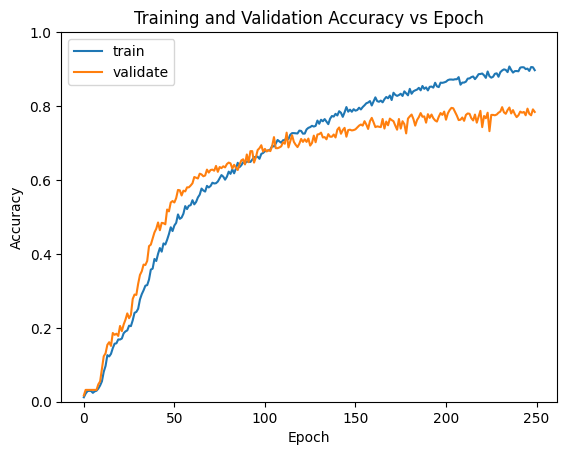

In [ ]:





accuracy = []

for i in range(number_of_repetitions):

  result = load_and_split_data(cross_validation_round = i)

  train_data_images, validation_data_images, test_data_images = result[12:15]

  labels_1 = result[0] # train_data_images_identities_order_by_location
  labels_2 = result[1] # train_data_images_illuminance_order_by_location
  train_data_images_identities_order_by_location = labels_1
  train_data_images_illuminance_order_by_location = labels_2
  combined_labels_train = labels_2 + labels_1*(number_of_classes_illuminance ** 3)

  labels_1 = result[4] # validation_data_images_identities_order_by_location
  labels_2 = result[5] # validation_data_images_illuminance_order_by_location
  validation_data_images_identities_order_by_location = labels_1
  validation_data_images_illuminance_order_by_location = labels_2
  combined_labels_validation = labels_2 + labels_1*(number_of_classes_illuminance ** 3)

  labels_1 = result[8] # test_data_images_identities_order_by_location
  labels_2 = result[9] # test_data_images_illuminance_order_by_location
  test_data_images_identities_order_by_location = labels_1
  test_data_images_illuminance_order_by_location = labels_2
  combined_labels_test = labels_2 + labels_1*(number_of_classes_illuminance ** 3)

  def CNN_network():
      model = Sequential()

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None,input_shape=(140,140,1)))

      model.add(Conv2D(512,(10,10),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(512,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(256,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Flatten())

      model.add(Dense(200,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(200,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal',input_dim=200))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense((number_of_classes_identity ** 3)*(number_of_classes_illuminance ** 3),activation='softmax'))

      return model

  CNN_network = CNN_network()
  CNN_network.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  history = CNN_network.fit(train_data_images,combined_labels_train,validation_data=(validation_data_images,combined_labels_validation),epochs=250,batch_size=256,shuffle=True)

  scores = CNN_network.evaluate(test_data_images,combined_labels_test)
  accuracy.append(scores[1])
  print("Accuracy:%.2f%%" %(scores[1]*100))

print(accuracy)







#Plot accuracy vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1.0])
plt.xlabel('Epoch')
plt.legend(['train','validate'],loc='upper left')
plt.show()






In [ ]:

print(accuracy)

[0.7549999952316284, 0.734000027179718, 0.75]


## Network one pathway Orientation and Location  

Epoch 1/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 585ms/step - accuracy: 0.0022 - loss: 8.5774 - val_accuracy: 0.0030 - val_loss: 7.3635
Epoch 2/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.0018 - loss: 7.1257 - val_accuracy: 0.0010 - val_loss: 6.8560
Epoch 3/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.0026 - loss: 6.6843 - val_accuracy: 0.0010 - val_loss: 6.6707
Epoch 4/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.0040 - loss: 6.5542 - val_accuracy: 0.0020 - val_loss: 6.5904
Epoch 5/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.0024 - loss: 6.4681 - val_accuracy: 0.0030 - val_loss: 6.4160
Epoch 6/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.0076 - loss: 6.2667 - val_accuracy: 0.0090 - val_loss: 6.0214
Epoch 7/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.0110 - loss: 5.8413 - val_accuracy: 0.0340 - val_loss: 5.4126
Epoch 8/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.0201 - loss: 5.4753 - val_accuracy: 

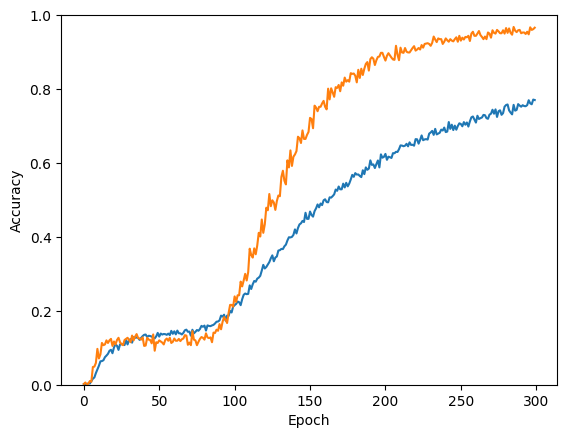

In [ ]:



accuracy = []

for i in range(number_of_repetitions):

  result = load_and_split_data(cross_validation_round = i)

  train_data_images, validation_data_images, test_data_images = result[12:15]

  labels_1 = result[2] # train_data_images_orientations_order_by_location
  labels_2 = result[3] # train_data_images_locations_without_order
  train_data_images_orientations_order_by_location = labels_1
  train_data_images_locations_without_order = labels_2
  combined_labels_train = labels_2 + labels_1*(number_of_classes_location ** 3)

  labels_1 = result[6] # validation_data_images_orientations_order_by_location
  labels_2 = result[7] # validation_data_images_locations_without_order
  validation_data_images_orientations_order_by_location = labels_1
  validation_data_images_locations_without_order = labels_2
  combined_labels_validation = labels_2 + labels_1*(number_of_classes_location ** 3)

  labels_1 = result[10] # test_data_images_orientations_order_by_location
  labels_2 = result[11] # test_data_images_locations_without_order
  test_data_images_orientations_order_by_location = labels_1
  test_data_images_locations_without_order = labels_2
  combined_labels_test = labels_2 + labels_1*(number_of_classes_location ** 3)

  def CNN_network():
      model = Sequential()

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None,input_shape=(140,140,1)))

      model.add(Conv2D(512,(10,10),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(512,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(256,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Flatten())

      model.add(Dense(200,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(200,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal',input_dim=200))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense((number_of_classes_orientation ** 3)*(number_of_classes_location ** 3),activation='softmax'))

      return model

  CNN_network = CNN_network()
  CNN_network.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  history = CNN_network.fit(train_data_images,combined_labels_train,validation_data=(validation_data_images,combined_labels_validation),epochs=300,batch_size=256,shuffle=True)

  scores = CNN_network.evaluate(test_data_images,combined_labels_test)
  accuracy.append(scores[1])
  print("Accuracy:%.2f%%" %(scores[1]*100))

print(accuracy)




#Plot accuracy vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
# plt.title('Training and Validation Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1.0])
plt.xlabel('Epoch')
# plt.legend(['train','validate'],loc='upper left')
plt.show()


In [ ]:

print(accuracy)

[0.9589999914169312, 0.9620000123977661, 0.972000002861023]


## Network one pathway Identity and Location   

Epoch 1/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 564ms/step - accuracy: 1.6937e-04 - loss: 9.8514 - val_accuracy: 0.0000e+00 - val_loss: 9.1927
Epoch 2/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.0012 - loss: 8.4745 - val_accuracy: 0.0010 - val_loss: 8.6984
Epoch 3/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 4.2500e-04 - loss: 7.8212 - val_accuracy: 0.0030 - val_loss: 8.4931
Epoch 4/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.0016 - loss: 7.6232 - val_accuracy: 0.0000e+00 - val_loss: 8.4386
Epoch 5/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.0012 - loss: 7.5568 - val_accuracy: 0.0000e+00 - val_loss: 8.4355
Epoch 6/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.0038 - loss: 7.4477 - val_accuracy: 0.0000e+00 - val_loss: 8.3678
Epoch 7/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.0040 - loss: 7.2996 - val_accuracy: 0.0010 - val_loss: 8.2720
Epoch 8/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.0057 - loss:

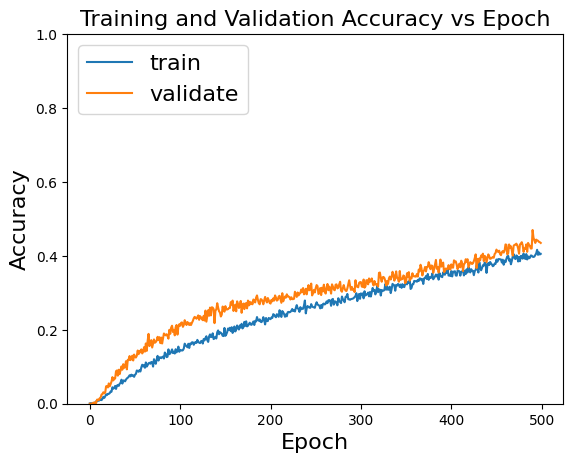

In [ ]:



accuracy = []

for i in range(number_of_repetitions):

  result = load_and_split_data(cross_validation_round = i)

  train_data_images, validation_data_images, test_data_images = result[12:15]

  labels_1 = result[0] # train_data_images_identities_order_by_location
  labels_2 = result[3] # train_data_images_locations_without_order
  train_data_images_identities_order_by_location = labels_1
  train_data_images_locations_without_order = labels_2
  combined_labels_train = labels_2 + labels_1*(number_of_classes_location ** 3)

  labels_1 = result[4] # validation_data_images_identities_order_by_location
  labels_2 = result[7] # validation_data_images_locations_without_order
  validation_data_images_identities_order_by_location = labels_1
  validation_data_images_locations_without_order = labels_2
  combined_labels_validation = labels_2 + labels_1*(number_of_classes_location ** 3)

  labels_1 = result[8] # test_data_images_identities_order_by_location
  labels_2 = result[11] # test_data_images_locations_without_order
  test_data_images_identities_order_by_location = labels_1
  test_data_images_locations_without_order = labels_2
  combined_labels_test = labels_2 + labels_1*(number_of_classes_location ** 3)

  def CNN_network():
      model = Sequential()

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None,input_shape=(140,140,1)))

      model.add(Conv2D(512,(10,10),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(512,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(256,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Flatten())

      model.add(Dense(200,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(200,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal',input_dim=200))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense((number_of_classes_identity ** 3)*(number_of_classes_location ** 3),activation='softmax'))

      return model

  CNN_network = CNN_network()
  CNN_network.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  history = CNN_network.fit(train_data_images,combined_labels_train,validation_data=(validation_data_images,combined_labels_validation),epochs=500,batch_size=256,shuffle=True)

  scores = CNN_network.evaluate(test_data_images,combined_labels_test)
  accuracy.append(scores[1])
  print("Accuracy:%.2f%%" %(scores[1]*100))

print(accuracy)




#Plot accuracy vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy vs Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.ylim([0, 1.0])
plt.xlabel('Epoch', fontsize=16)
plt.legend(['train','validate'],loc='upper left', fontsize=16)
plt.show()


In [ ]:

print(accuracy)

# 0.38499999046325684, 0.4569999873638153, 0.5170000195503235
# 0.6190000176429749, 0.4690000116825104, 0.5600000023841858
# 0.5370000004768372, 0.34200000762939453, 0.39899998903274536


[0.5370000004768372, 0.34200000762939453, 0.39899998903274536]


## Network one pathway Identity and Orientation     

Epoch 1/700
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 481ms/step - accuracy: 0.0044 - loss: 5.3767 - val_accuracy: 0.0030 - val_loss: 5.3752
Epoch 2/700
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.0061 - loss: 5.3735 - val_accuracy: 0.0080 - val_loss: 5.3749
Epoch 3/700
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.0063 - loss: 5.3693 - val_accuracy: 0.0020 - val_loss: 5.3729
Epoch 4/700
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.0041 - loss: 5.3616 - val_accuracy: 0.0070 - val_loss: 5.3683
Epoch 5/700
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.0066 - loss: 5.3430 - val_accuracy: 0.0070 - val_loss: 5.3385
Epoch 6/700
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.0079 - loss: 5.2936 - val_accuracy: 0.0060 - val_loss: 5.2715
Epoch 7/700
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.0108 - loss: 5.2203 - val_accuracy: 0.0040 - val_loss: 5.1734
Epoch 8/700
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.0095 - loss: 5.1653 - val_accuracy: 

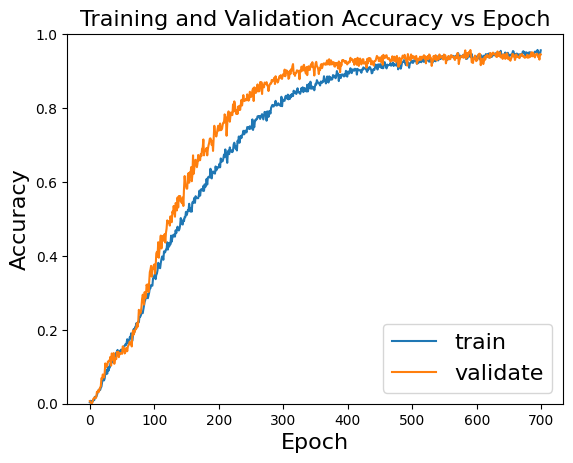

In [ ]:



accuracy = []

for i in range(number_of_repetitions):

  result = load_and_split_data(cross_validation_round = i)

  train_data_images, validation_data_images, test_data_images = result[12:15]

  labels_1 = result[0] # train_data_images_identities_order_by_location
  labels_2 = result[2] # train_data_images_orientations_order_by_location
  train_data_images_identities_order_by_location = labels_1
  train_data_images_orientations_order_by_location = labels_2
  combined_labels_train = labels_2 + labels_1*(number_of_classes_orientation ** 3)

  labels_1 = result[4] # validation_data_images_identities_order_by_location
  labels_2 = result[6] # validation_data_images_orientations_order_by_location
  validation_data_images_identities_order_by_location = labels_1
  validation_data_images_orientations_order_by_location = labels_2
  combined_labels_validation = labels_2 + labels_1*(number_of_classes_orientation ** 3)

  labels_1 = result[8] # test_data_images_identities_order_by_location
  labels_2 = result[10] # test_data_images_orientations_order_by_location
  test_data_images_identities_order_by_location = labels_1
  test_data_images_orientations_order_by_location = labels_2
  combined_labels_test = labels_2 + labels_1*(number_of_classes_orientation ** 3)

  def CNN_network():
      model = Sequential()

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None,input_shape=(140,140,1)))

      model.add(Conv2D(512,(10,10),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(512,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(256,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Flatten())

      model.add(Dense(200,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(200,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal',input_dim=200))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense((number_of_classes_identity ** 3)*(number_of_classes_orientation ** 3),activation='softmax'))

      return model

  CNN_network = CNN_network()
  CNN_network.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  history = CNN_network.fit(train_data_images,combined_labels_train,validation_data=(validation_data_images,combined_labels_validation),epochs=700,batch_size=256,shuffle=True)

  scores = CNN_network.evaluate(test_data_images,combined_labels_test)
  accuracy.append(scores[1])
  print("Accuracy:%.2f%%" %(scores[1]*100))

print(accuracy)




#Plot accuracy vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy vs Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.ylim([0, 1.0])
plt.xlabel('Epoch', fontsize=16)
plt.legend(['train','validate'],loc='lower right', fontsize=16)
plt.show()


In [ ]:

print(accuracy)

[0.9259999990463257, 0.8709999918937683, 0.9419999718666077]


## Network one pathway Illuminance and Orientation  

Epoch 1/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 530ms/step - accuracy: 0.0251 - loss: 4.1516 - val_accuracy: 0.0260 - val_loss: 4.1252
Epoch 2/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.0342 - loss: 4.0926 - val_accuracy: 0.0290 - val_loss: 4.0476
Epoch 3/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.0388 - loss: 4.0319 - val_accuracy: 0.0290 - val_loss: 3.9654
Epoch 4/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.0366 - loss: 3.9347 - val_accuracy: 0.0340 - val_loss: 3.8589
Epoch 5/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.0319 - loss: 3.9534 - val_accuracy: 0.0380 - val_loss: 3.8537
Epoch 6/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.0394 - loss: 3.8506 - val_accuracy: 0.0350 - val_loss: 3.8037
Epoch 7/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.0375 - loss: 3.8006 - val_accuracy: 0.0370 - val_loss: 3.7963
Epoch 8/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.0403 - loss: 3.7641 - val_accuracy: 

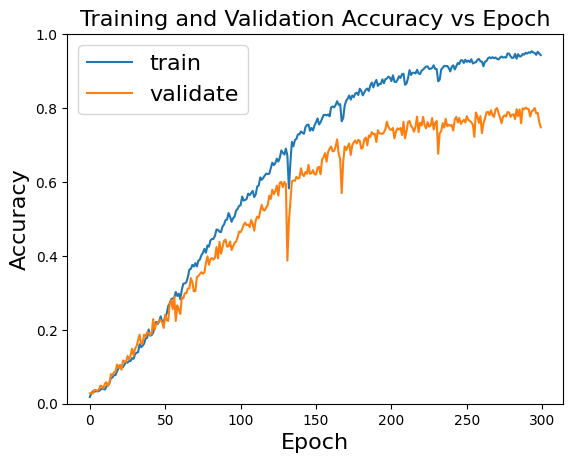

In [ ]:



accuracy = []

for i in range(number_of_repetitions):

  result = load_and_split_data(cross_validation_round = i)

  train_data_images, validation_data_images, test_data_images = result[12:15]

  labels_1 = result[1] # train_data_images_illuminance_order_by_location
  labels_2 = result[2] # train_data_images_orientations_order_by_location
  train_data_images_illuminance_order_by_location = labels_1
  train_data_images_orientations_order_by_location = labels_2
  combined_labels_train = labels_2 + labels_1*(number_of_classes_orientation ** 3)

  labels_1 = result[5] # validation_data_images_illuminance_order_by_location
  labels_2 = result[6] # validation_data_images_orientations_order_by_location
  validation_data_images_illuminance_order_by_location = labels_1
  validation_data_images_orientations_order_by_location = labels_2
  combined_labels_validation = labels_2 + labels_1*(number_of_classes_orientation ** 3)

  labels_1 = result[9] # test_data_images_illuminance_order_by_location
  labels_2 = result[10] # test_data_images_orientations_order_by_location
  test_data_images_illuminance_order_by_location = labels_1
  test_data_images_orientations_order_by_location = labels_2
  combined_labels_test = labels_2 + labels_1*(number_of_classes_orientation ** 3)

  def CNN_network():
      model = Sequential()

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None,input_shape=(140,140,1)))

      model.add(Conv2D(512,(10,10),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(512,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(256,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Flatten())

      model.add(Dense(200,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(200,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal',input_dim=200))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense((number_of_classes_illuminance ** 3)*(number_of_classes_orientation ** 3),activation='softmax'))

      return model

  CNN_network = CNN_network()
  CNN_network.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  history = CNN_network.fit(train_data_images,combined_labels_train,validation_data=(validation_data_images,combined_labels_validation),epochs=300,batch_size=256,shuffle=True)

  scores = CNN_network.evaluate(test_data_images,combined_labels_test)
  accuracy.append(scores[1])
  print("Accuracy:%.2f%%" %(scores[1]*100))

print(accuracy)



#Plot accuracy vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy vs Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.ylim([0, 1.0])
plt.xlabel('Epoch', fontsize=16)
plt.legend(['train','validate'],loc='upper left', fontsize=16)
plt.show()


In [ ]:

print(accuracy)

[0.843999981880188, 0.859000027179718, 0.7459999918937683]


## Network one pathway Illuminance and Location (Order by Location)  

Epoch 1/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 494ms/step - accuracy: 7.6049e-04 - loss: 8.5242 - val_accuracy: 0.0100 - val_loss: 7.5329
Epoch 2/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.0028 - loss: 7.0254 - val_accuracy: 0.0050 - val_loss: 6.7094
Epoch 3/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.0026 - loss: 6.5300 - val_accuracy: 0.0050 - val_loss: 6.5497
Epoch 4/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.0056 - loss: 6.3808 - val_accuracy: 0.0080 - val_loss: 6.3397
Epoch 5/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.0121 - loss: 6.1874 - val_accuracy: 0.0180 - val_loss: 6.0609
Epoch 6/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.0130 - loss: 5.9160 - val_accuracy: 0.0220 - val_loss: 5.7242
Epoch 7/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.0243 - loss: 5.5921 - val_accuracy: 0.0440 - val_loss: 5.2458
Epoch 8/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.0218 - loss: 5.2343 - val_accura

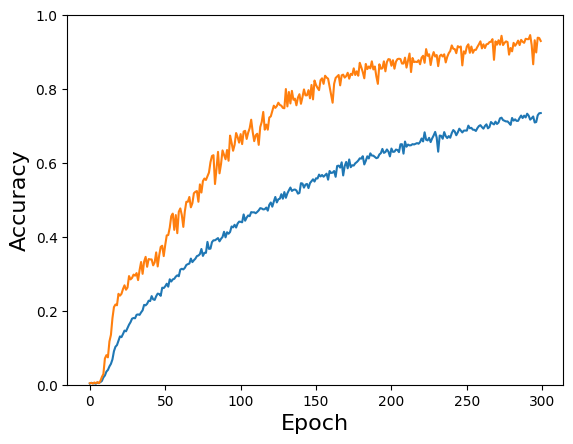

In [ ]:



accuracy = []

for i in range(number_of_repetitions):

  result = load_and_split_data(cross_validation_round = i)

  train_data_images, validation_data_images, test_data_images = result[12:15]

  labels_1 = result[1] # train_data_images_illuminance_order_by_location
  labels_2 = result[3] # train_data_images_locations_without_order
  train_data_images_illuminance_order_by_location = labels_1
  train_data_images_locations_without_order = labels_2
  combined_labels_train = labels_2 + labels_1*(number_of_classes_location ** 3)

  labels_1 = result[5] # validation_data_images_illuminance_order_by_location
  labels_2 = result[7] # validation_data_images_locations_without_order
  validation_data_images_illuminance_order_by_location = labels_1
  validation_data_images_locations_without_order = labels_2
  combined_labels_validation = labels_2 + labels_1*(number_of_classes_location ** 3)

  labels_1 = result[9] # test_data_images_illuminance_order_by_location
  labels_2 = result[11] # test_data_images_locations_without_order
  test_data_images_illuminance_order_by_location = labels_1
  test_data_images_locations_without_order = labels_2
  combined_labels_test = labels_2 + labels_1*(number_of_classes_location ** 3)

  def CNN_network():
      model = Sequential()

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None,input_shape=(140,140,1)))

      model.add(Conv2D(512,(10,10),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(512,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(256,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Flatten())

      model.add(Dense(200,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(200,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal',input_dim=200))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense((number_of_classes_illuminance ** 3)*(number_of_classes_location ** 3),activation='softmax'))

      return model

  CNN_network = CNN_network()
  CNN_network.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  history = CNN_network.fit(train_data_images,combined_labels_train,validation_data=(validation_data_images,combined_labels_validation),epochs=300,batch_size=256,shuffle=True)

  scores = CNN_network.evaluate(test_data_images,combined_labels_test)
  accuracy.append(scores[1])
  print("Accuracy:%.2f%%" %(scores[1]*100))

print(accuracy)



#Plot accuracy vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
# plt.title('Training and Validation Accuracy vs Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.ylim([0, 1.0])
plt.xlabel('Epoch', fontsize=16)
# plt.legend(['train','validate'],loc='upper left', fontsize=16)
plt.show()


In [ ]:

print(accuracy)

[0.9279999732971191, 0.9179999828338623, 0.9290000200271606]


# end of notebook